# UCI Heart Disease Dataset

## Column Descriptions:

1. id: (Unique id for each patient)
2. age: (Age of the patient in years)
3. origin: (place of study)
4. sex: (Male/Female)
5. cp: chest pain type: 
    * typical angina
    * atypical angina
    * non-anginal 
    * asymptomatic
6. trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol: (serum cholesterol in mg/dl)
8. fbs: (if fasting blood sugar > 120 mg/dl)
9. restecg: (resting electrocardiographic results)
--Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

### About Dataset
. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia.  This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Import Libraries

In [1]:
# To handle Data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification\Regression Tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_7584\3058693055.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import Dataset

In [159]:
df = pd.read_csv("C:\\Users\\ALICOM4\\OneDrive\\Desktop\\Learnings\\Excel Data\\heart_disease_uci.csv")
df

id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    2  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]

## Exploratory Data Analysis

### Explore Each Column 

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [161]:
df.shape

(920, 16)

In [162]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [163]:
df["id"].min(), df["id"].max()

(1, 920)

#### Explore Age Column

In [164]:
df["age"].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [165]:
df["age"].min(), df["age"].max()

(28, 77)

Mean :  53.51086956521739
Median :  54.0
Mode :  54


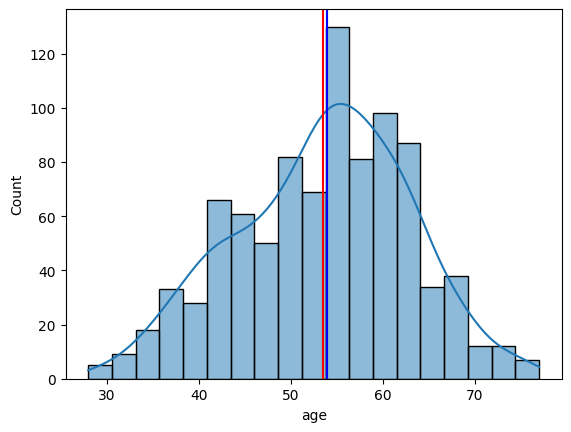

In [166]:
sns.histplot(df["age"], kde = True)
plt.axvline(df["age"].mean(), color="Red")
plt.axvline(df["age"].median(), color="Green")
plt.axvline(df["age"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["age"].mean())
print("Median : ", df["age"].median())
print("Mode : ", df["age"].mode()[0])

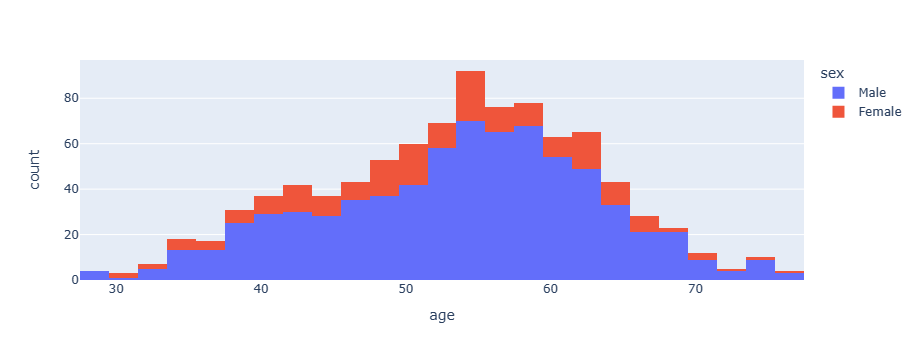

In [167]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [168]:
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [169]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [170]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [171]:
male_count= 726
female_count= 194
total_count=male_count+female_count

## For Percentage
male_percentage =(male_count/total_count) * 100
female_percentage =(female_count/total_count) * 100

## Display the Result
print(f"Male percentage in the data : ,{male_percentage:.2f}%")
print(f"Female percentage in the data : ,{female_percentage:.2f}%")

## Difference
difference_percentage = ((male_count - female_count) / female_count * 100)
print(f"Male are : {difference_percentage:.2f} more than female in the data")


Male percentage in the data : ,78.91%
Female percentage in the data : ,21.09%
Male are : 274.23 more than female in the data


#### Explore Dataset Column

In [172]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [173]:
df["dataset"].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

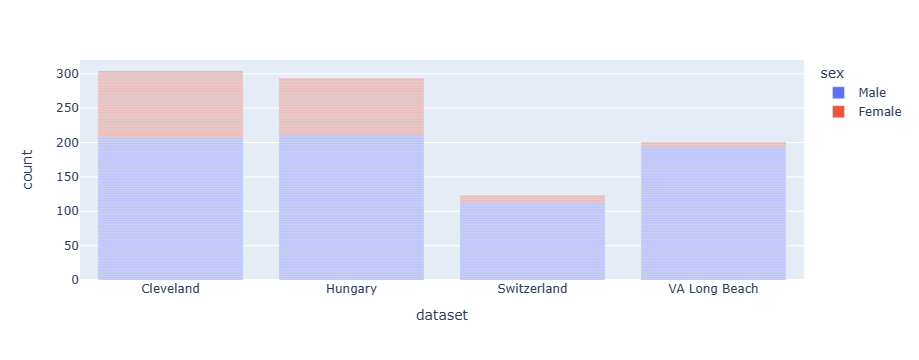

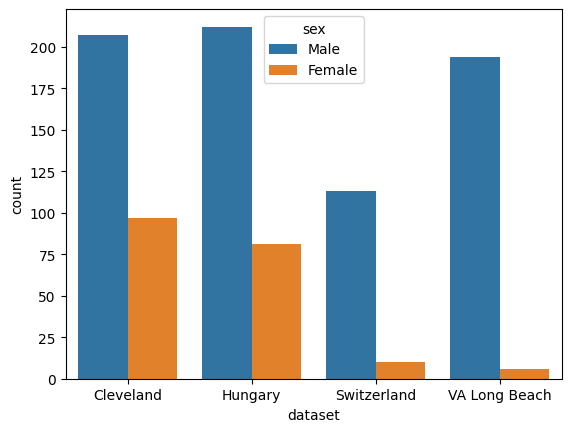

In [174]:
## via Seaborn
sns.countplot(data=df, x='dataset', hue='sex')

## via Plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [175]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

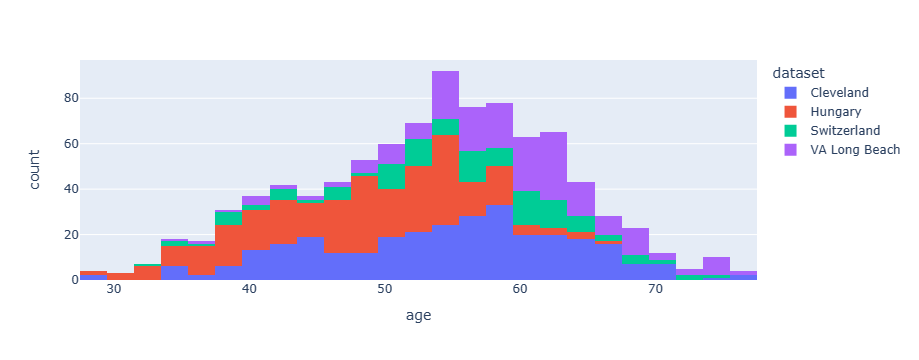

In [176]:
fig =px.histogram(data_frame=df, x="age", color='dataset')
fig.show()

In [177]:
## Find mean median mode of each country

print("Mean:")
print(df.groupby('dataset')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('dataset')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean:
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------
Median:
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------
Mode:
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Explore CP (Chest Pain) Columns

In [178]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [179]:
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

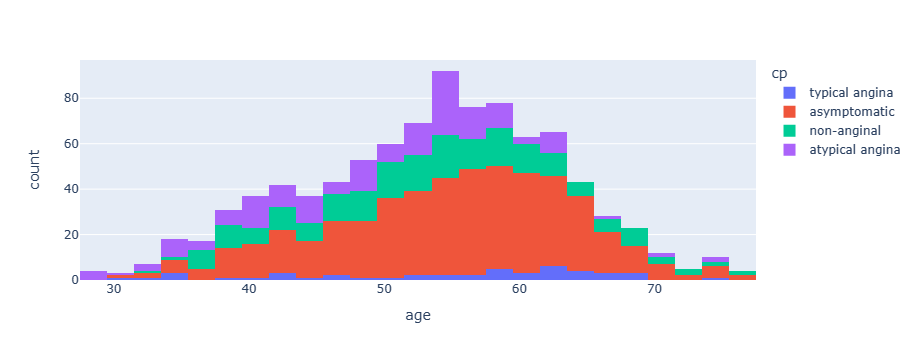

In [180]:
fig = px.histogram(data_frame=df, x="age", color='cp')
fig.show()

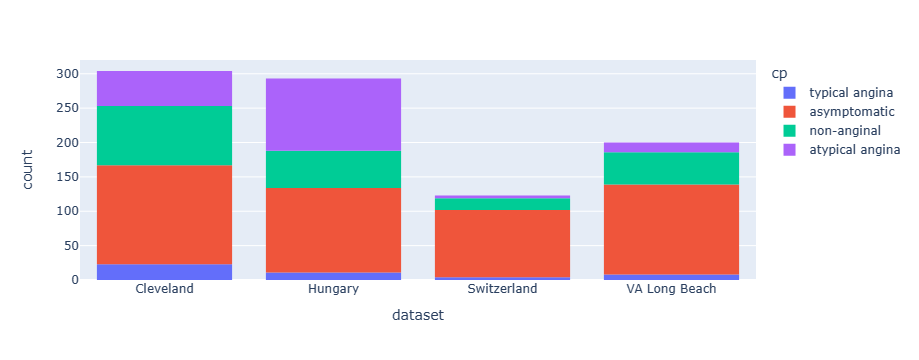

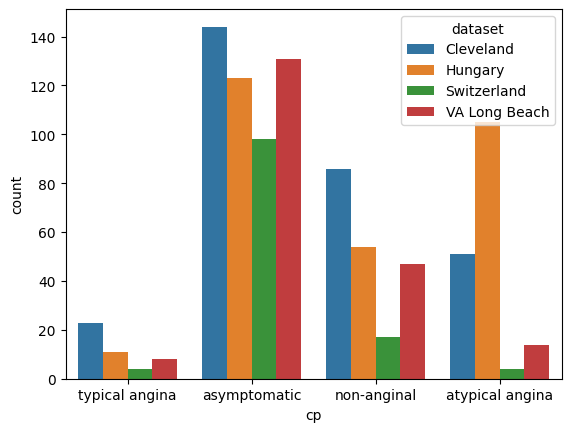

In [181]:
sns.countplot(data=df, x='cp', hue='dataset')


fig = px.histogram(data_frame=df, x="dataset", color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

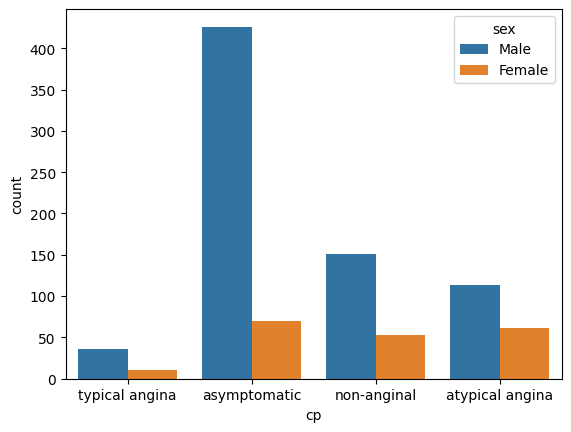

In [182]:
sns.countplot(data=df, x='cp', hue='sex')

In [183]:
df.groupby('sex')['cp'].value_counts()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

In [184]:
df.groupby('dataset')['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

In [185]:
print("Mean:")
print(df.groupby('cp')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('cp')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('cp')['age'].agg(pd.Series.mode))

Mean:
cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64
----------
Median:
cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.5
typical angina     59.0
Name: age, dtype: float64
----------
Mode:
cp
asymptomatic             57
atypical angina          54
non-anginal        [51, 54]
typical angina           62
Name: age, dtype: object


#### Explore TRESTBPS Column:

\\ The Normal Blood Pressure is 120/80 mm Hg.

In [186]:
df['trestbps'].nunique()

61

In [187]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [188]:
print("Minimum Count : ", df['trestbps'].min()) 
print("Maximum Count : ", df['trestbps'].max())

Minimum Count :  0.0
Maximum Count :  200.0


In [189]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

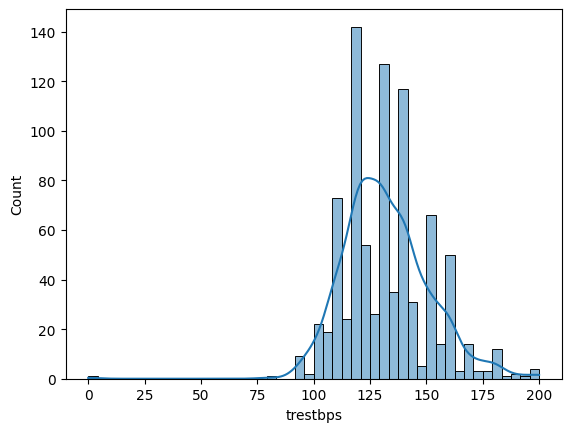

In [190]:
sns.histplot(df["trestbps"], kde=True)

#### Dealing With Missing Values

In [191]:
(f"Percentage of missing values in TRESTBPS column is : {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

'Percentage of missing values in TRESTBPS column is : 6.41%'

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [193]:
df.isnull().sum() / len(df) * 100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

##### Imputing Numerical Columns

In [194]:
### Trestbps Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['trestbps']])
df['trestbps'] = imputer.transform(df[['trestbps']])
print(f"Percentage of missing values in TRESTBPS column is : {df['trestbps'].isnull().sum()}")

Percentage of missing values in TRESTBPS column is : 0


In [195]:
### chol Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['chol']])
df['chol'] = imputer.transform(df[['chol']])
print(f"Percentage of missing values in CHOL column is : {df['chol'].isnull().sum()}")

Percentage of missing values in CHOL column is : 0


In [196]:
### thalch Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['thalch']])
df['thalch'] = imputer.transform(df[['thalch']])
print(f"Percentage of missing values in THALCH column is : {df['thalch'].isnull().sum()}")

Percentage of missing values in THALCH column is : 0


In [197]:
### oldpeak Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['oldpeak']])
df['oldpeak'] = imputer.transform(df[['oldpeak']])
print(f"Percentage of missing values in OLDPEAK column is : {df['thalch'].isnull().sum()}")

Percentage of missing values in OLDPEAK column is : 0


In [198]:
### ca Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['ca']])
df['ca'] = imputer.transform(df[['ca']])
print(f"Percentage of missing values in CA column is : {df['ca'].isnull().sum()}")

Percentage of missing values in CA column is : 0


##### Imputing Categorical Columns 

In [199]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [200]:
df["thal"].value_counts()


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [201]:
df["fbs"].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [202]:
df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [203]:
df["exang"].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [204]:
df["slope"].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [205]:
df.isnull().sum() / len(df) * 100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
fbs          9.782609
restecg      0.217391
thalch       0.000000
exang        5.978261
oldpeak      0.000000
slope       33.586957
ca           0.000000
thal        52.826087
num          0.000000
dtype: float64

In [206]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [207]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [208]:
### Used this function only for categorical\cassifier columns, numerical\egressor columns have been imputed with using iterative imputer 

# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [209]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [210]:
##### We would run ths code two times because in first time it would give us the missing values in second time it would impute the missing values

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [211]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 79.89 accuracy

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 61.96 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 80.98 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 82.07 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 79.35 accuracy



In [212]:
df.isnull().sum() / len(df) * 100

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [213]:
df.tail()

id  age     sex        dataset               cp    trestbps   chol  \
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch  exang   oldpeak slope        ca  \
915   True  st-t abnormality  154.000000  False  0.000000  flat  0.676375   
916  False  st-t abnormality  137.545665  False  0.878788  flat  0.676375   
917   True  st-t abnormality  100.000000  False  0.000000  flat  0.676375   
918   True    lv hypertrophy  137.545665  False  0.878788  flat  0.676375   
919  False    lv hypertrophy   93.000000   True  0.000000  flat  0.676375   

                  thal  num  
915  reversable defect    1  
916             normal    0  
917       fixed defect    2  
918             normal    0  
919  reversable defect    1

#### Dealing with Outliers

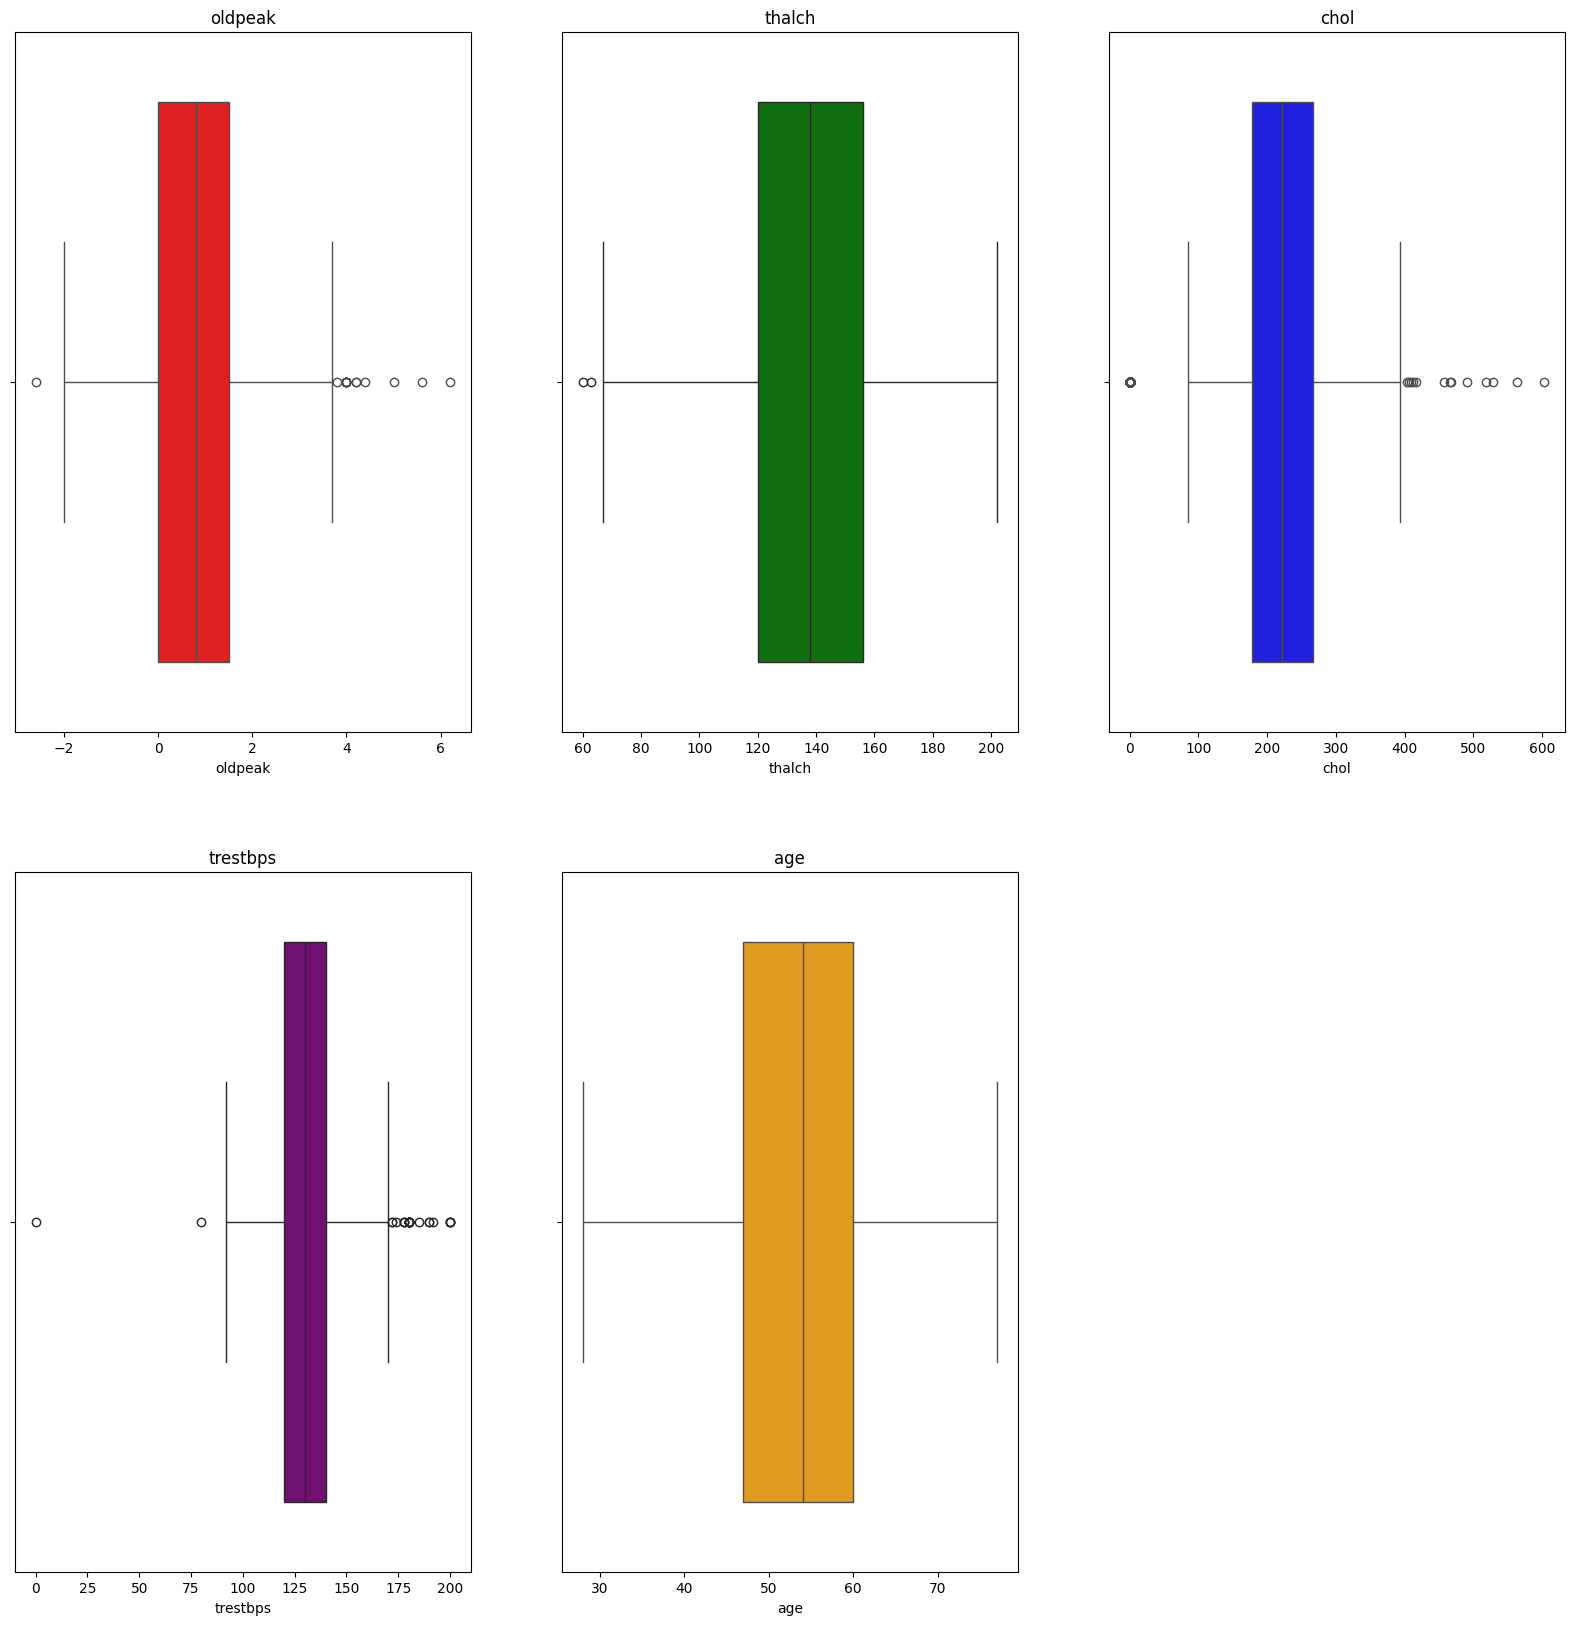

In [214]:

plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple', 'orange']

for i, col in enumerate(numerical_cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(col)

plt.show()

In [215]:
df = df[df['chol'] != 0]


In [216]:
df = df[df['trestbps'] != 0]

In [217]:
# Assuming df is your DataFrame containing blood pressure ('trestbps') and cholesterol ('chol') columns
# Drop rows where 'trestbps' is greater than 200 or 'chol' is greater than 600
df = df[(df['trestbps'] <= 190)]

# Now, df will contain only the rows where both 'trestbps' and 'chol' are within the specified thresholds


In [218]:
df = df[(df['chol'] >= 120) & (df['chol'] <= 450)]

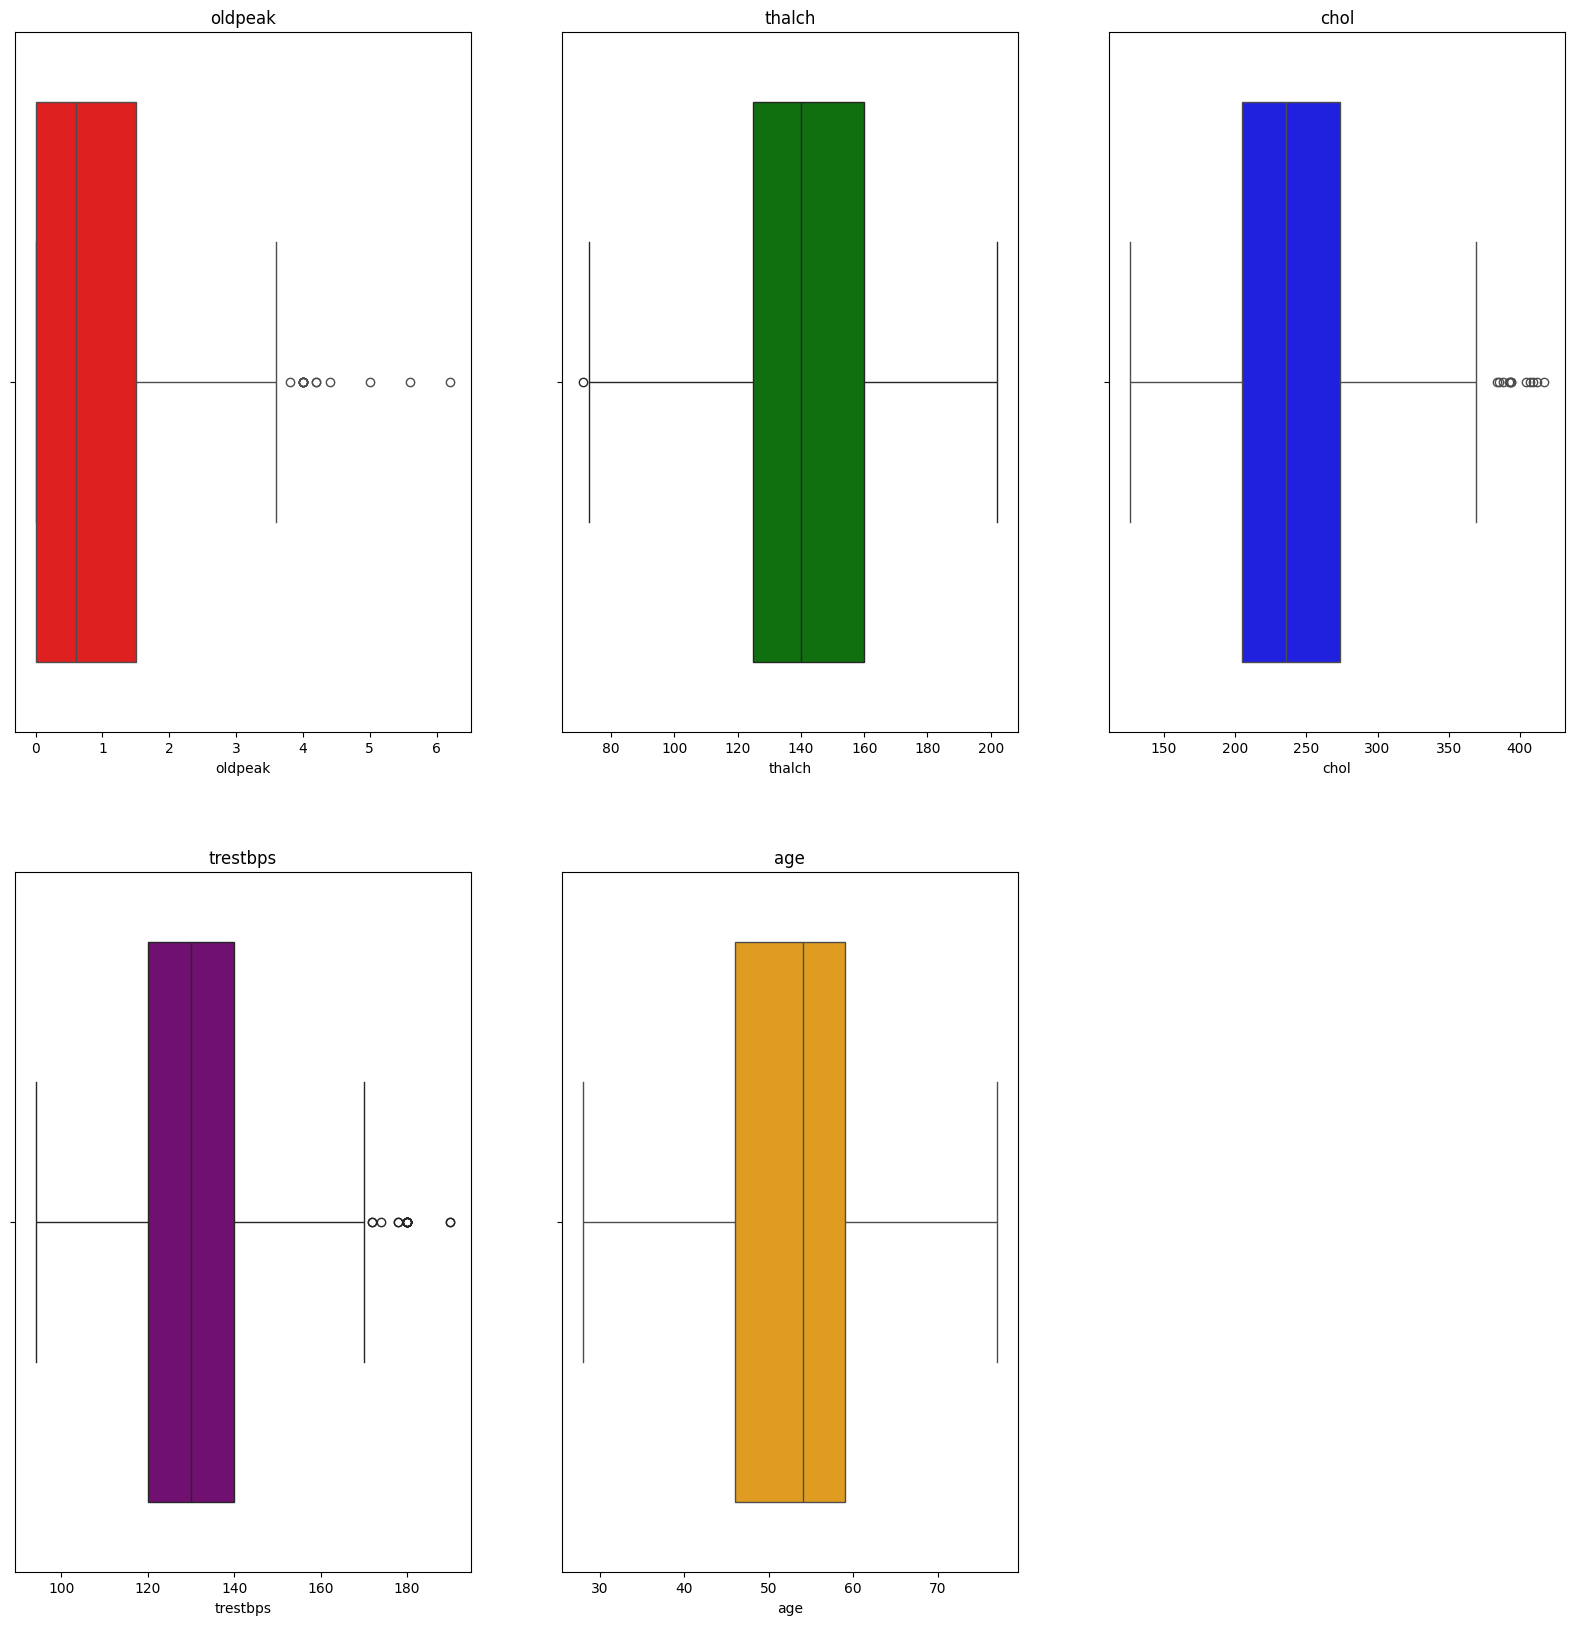

In [219]:
plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple', 'orange']

for i, col in enumerate(numerical_cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(col)

plt.show()

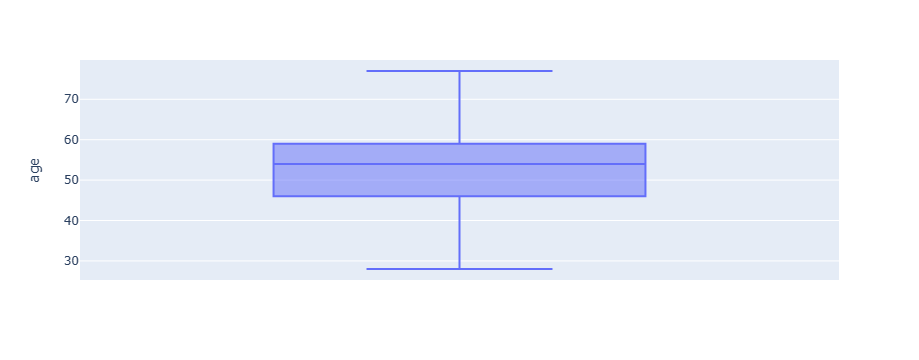

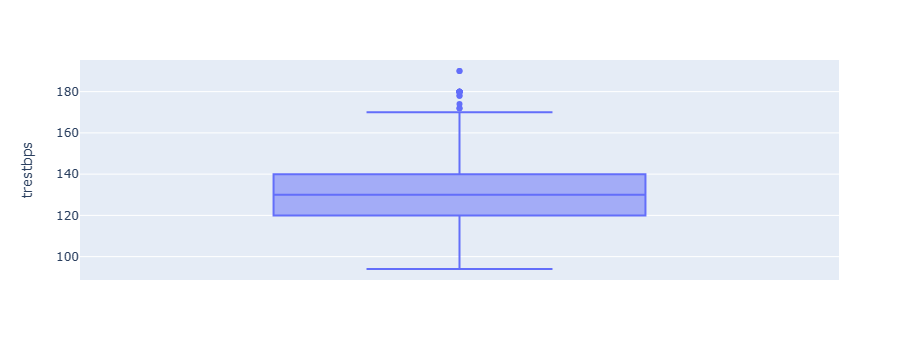

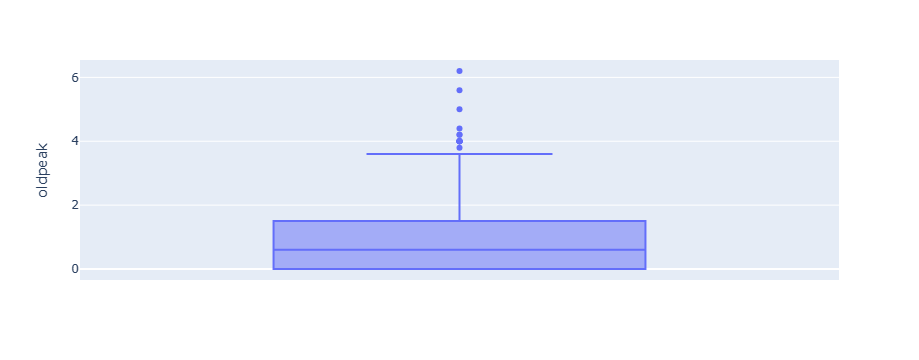

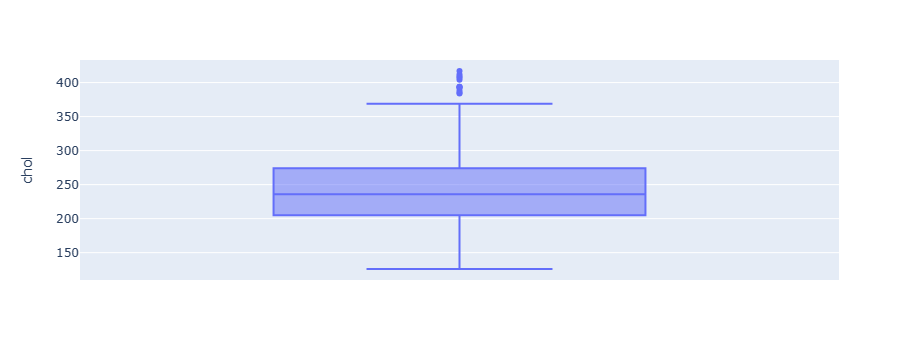

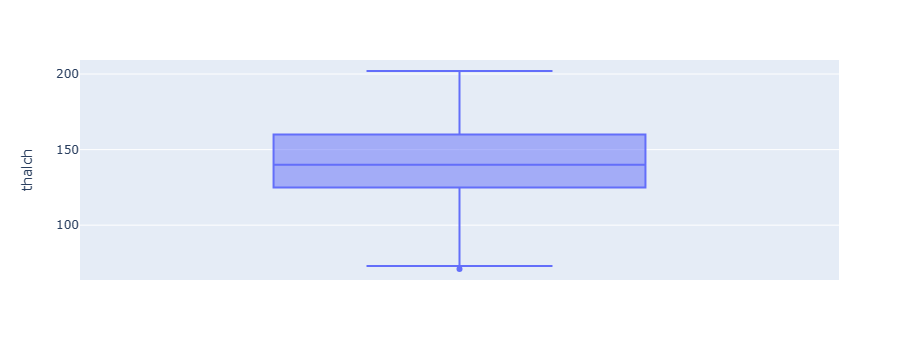

In [220]:
fig = px.box(data_frame= df, y='age')
fig.show()

fig = px.box(data_frame= df, y='trestbps')
fig.show()

fig = px.box(data_frame= df, y='oldpeak')
fig.show()

fig = px.box(data_frame= df, y='chol')
fig.show()

fig = px.box(data_frame= df, y='thalch')
fig.show()

### Continue EDA

#### Explore TRESTBPS column

In [221]:
df['trestbps'].nunique()

54

In [222]:
df.groupby('sex')['trestbps'].value_counts()

sex     trestbps
Female  120.0       30
        130.0       30
        140.0       17
        150.0       13
        110.0       10
                    ..
Male    129.0        1
        154.0        1
        164.0        1
        165.0        1
        178.0        1
Name: count, Length: 89, dtype: int64

Mean :  132.5758398258315
Median :  130.0
Mode :  120.0


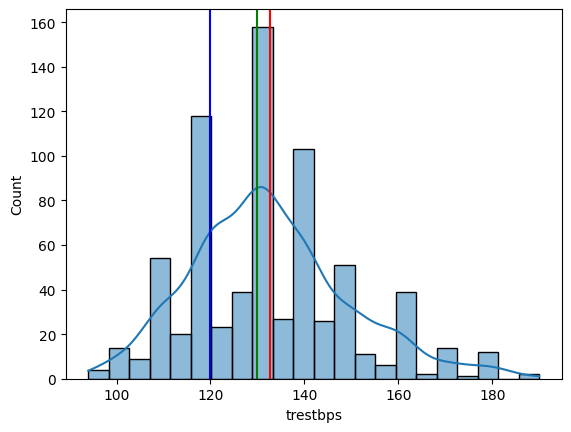

In [223]:
sns.histplot(df["trestbps"], kde = True)
plt.axvline(df["trestbps"].mean(), color="Red")
plt.axvline(df["trestbps"].median(), color="Green")
plt.axvline(df["trestbps"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["trestbps"].mean())
print("Median : ", df["trestbps"].median())
print("Mode : ", df["trestbps"].mode()[0])

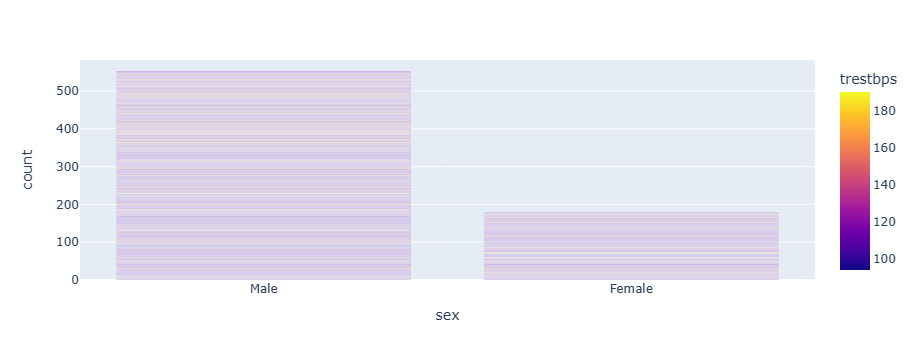

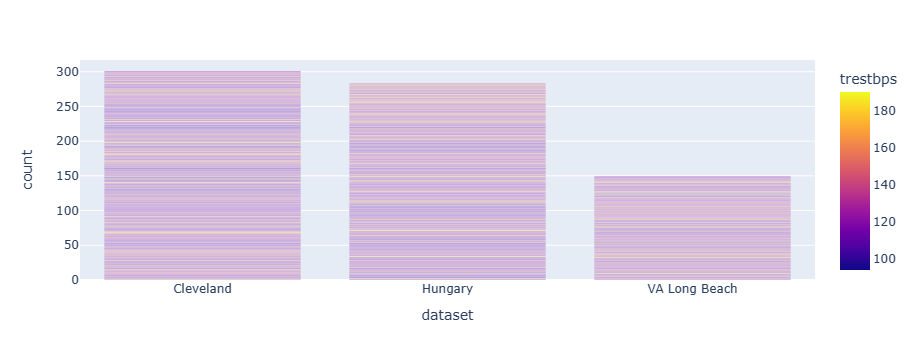

In [224]:
fig = px.bar(df, x='sex', color='trestbps')
fig.show()

fig = px.bar(df, x='dataset', color='trestbps')
fig.show()


#### Explore Chol Column

In [225]:
df.groupby('sex')['chol'].value_counts()

sex     chol      
Female  199.130337    7
        269.000000    4
        294.000000    4
        197.000000    3
        201.000000    3
                     ..
Male    384.000000    1
        385.000000    1
        388.000000    1
        404.000000    1
        412.000000    1
Name: count, Length: 308, dtype: int64

In [226]:
df.groupby('dataset')['chol'].value_counts()

dataset        chol 
Cleveland      197.0    6
               204.0    6
               234.0    6
               212.0    5
               254.0    5
                       ..
VA Long Beach  339.0    1
               349.0    1
               369.0    1
               384.0    1
               385.0    1
Name: count, Length: 393, dtype: int64

Mean :  242.74476140840324
Median :  236.0
Mode :  199.13033707865168


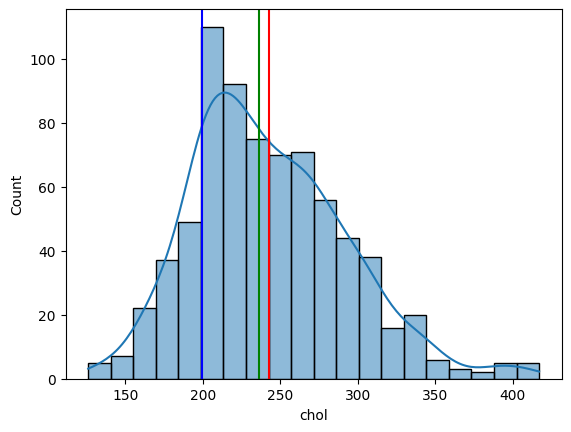

In [227]:
sns.histplot(df["chol"], kde = True)
plt.axvline(df["chol"].mean(), color="Red")
plt.axvline(df["chol"].median(), color="Green")
plt.axvline(df["chol"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["chol"].mean())
print("Median : ", df["chol"].median())
print("Mode : ", df["chol"].mode()[0])

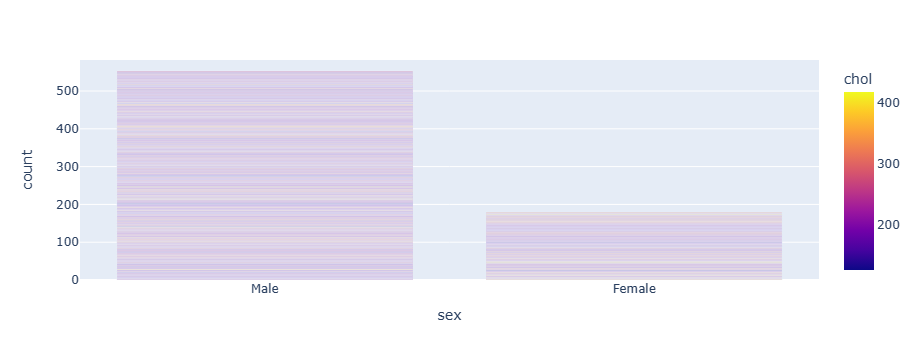

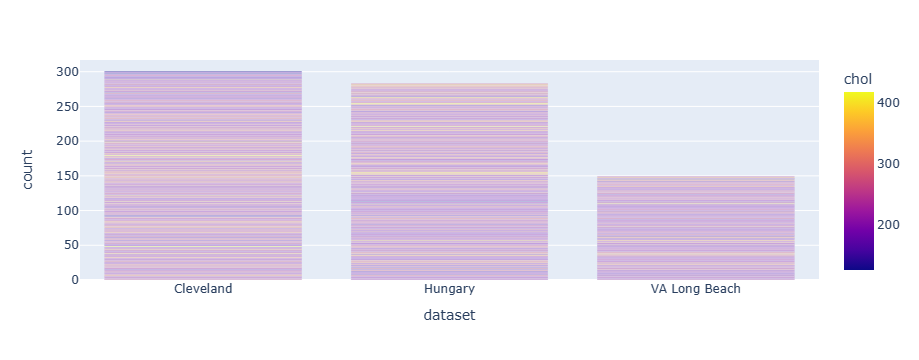

In [228]:
fig = px.bar(df, x='sex', color='chol')
fig.show()

fig = px.bar(df, x='dataset', color='chol')
fig.show()

#### FBS Column

In [229]:
df.groupby('sex')['fbs'].value_counts()

sex     fbs  
Female  False    162
        True      18
Male    False    452
        True     101
Name: count, dtype: int64

In [230]:
print("Mode : ", df["fbs"].mode()[0])

Mode :  False


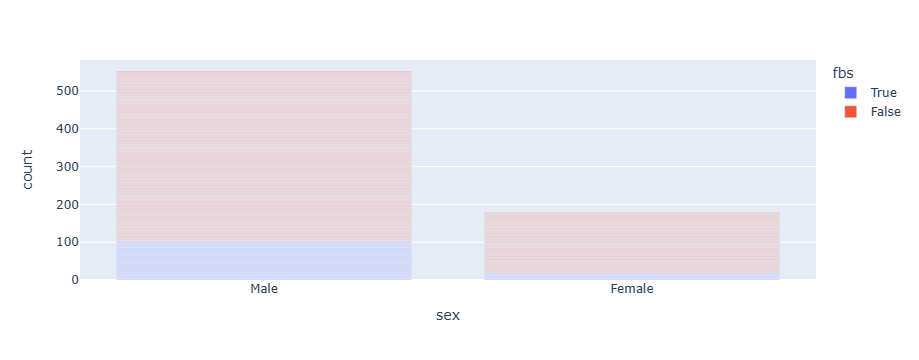

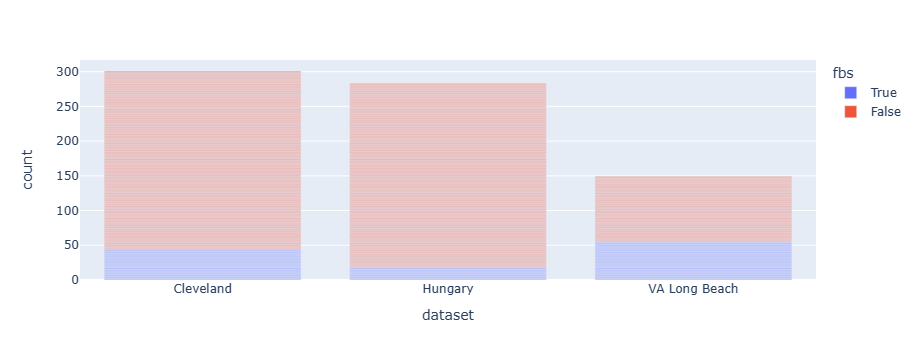

In [231]:
fig = px.bar(df, x='sex', color='fbs')
fig.show()

fig = px.bar(df, x='dataset', color='fbs')
fig.show()

In [232]:
df.groupby('sex')['fbs'].value_counts()

sex     fbs  
Female  False    162
        True      18
Male    False    452
        True     101
Name: count, dtype: int64

In [233]:
df.groupby('dataset')['fbs'].value_counts()

dataset        fbs  
Cleveland      False    257
               True      44
Hungary        False    264
               True      19
VA Long Beach  False     93
               True      56
Name: count, dtype: int64

#### RESTECG Column

In [234]:
df.groupby('sex')['restecg'].value_counts()

sex     restecg         
Female  normal              109
        lv hypertrophy       45
        st-t abnormality     26
Male    normal              325
        lv hypertrophy      128
        st-t abnormality    100
Name: count, dtype: int64

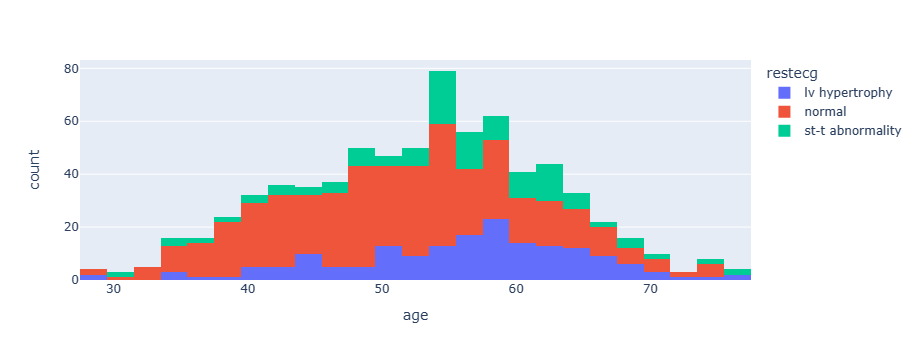

In [235]:
fig = px.histogram(data_frame=df, x="age", color='restecg')
fig

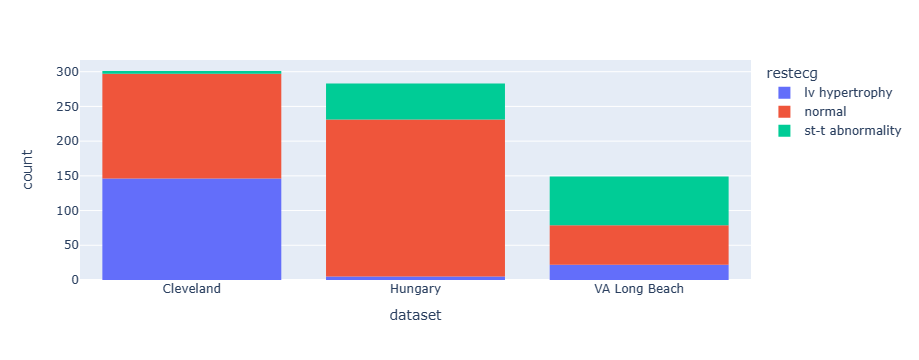

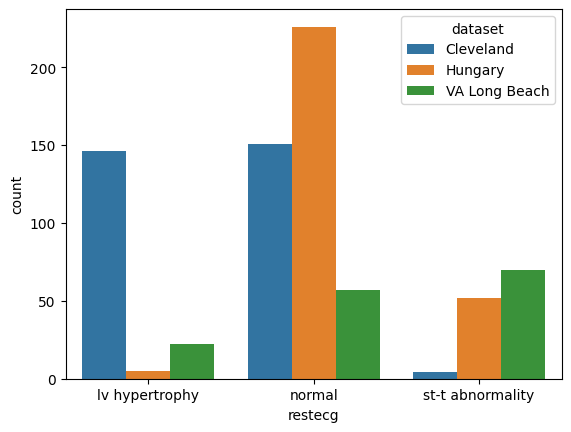

In [236]:
sns.countplot(data=df, x='restecg', hue='dataset')


fig = px.histogram(data_frame=df, x="dataset", color='restecg')
fig.show()

<Axes: xlabel='restecg', ylabel='count'>

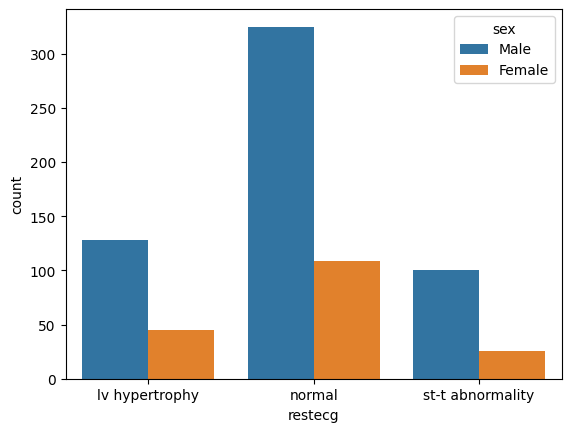

In [237]:
sns.countplot(data=df, x='restecg', hue='sex')

In [238]:
df.groupby('dataset')['restecg'].value_counts()

dataset        restecg         
Cleveland      normal              151
               lv hypertrophy      146
               st-t abnormality      4
Hungary        normal              226
               st-t abnormality     52
               lv hypertrophy        5
VA Long Beach  st-t abnormality     70
               normal               57
               lv hypertrophy       22
Name: count, dtype: int64

In [239]:
print("Mean:")
print(df.groupby('restecg')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('restecg')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('restecg')['age'].agg(pd.Series.mode))

Mean:
restecg
lv hypertrophy      55.890173
normal              51.064516
st-t abnormality    55.230159
Name: age, dtype: float64
----------
Median:
restecg
lv hypertrophy      57.0
normal              51.0
st-t abnormality    56.0
Name: age, dtype: float64
----------
Mode:
restecg
lv hypertrophy      58
normal              54
st-t abnormality    55
Name: age, dtype: int64


#### EXANG Column

In [240]:
df.groupby('sex')['exang'].value_counts()

sex     exang
Female  False    141
        True      39
Male    False    314
        True     239
Name: count, dtype: int64

In [241]:
df.groupby('dataset')['exang'].value_counts()

dataset        exang
Cleveland      False    203
               True      98
Hungary        False    199
               True      84
VA Long Beach  True      96
               False     53
Name: count, dtype: int64

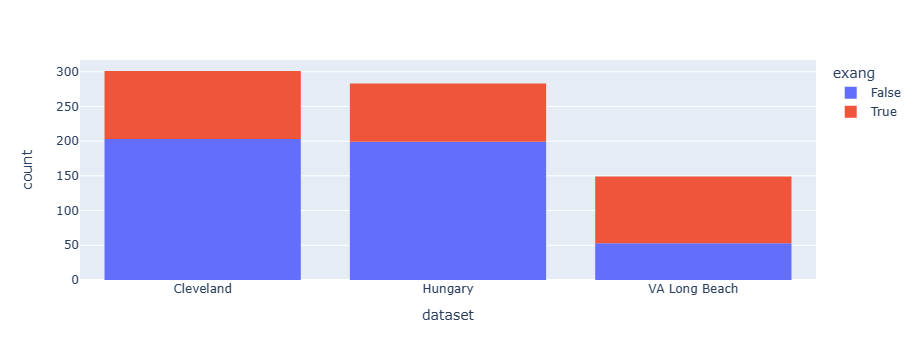

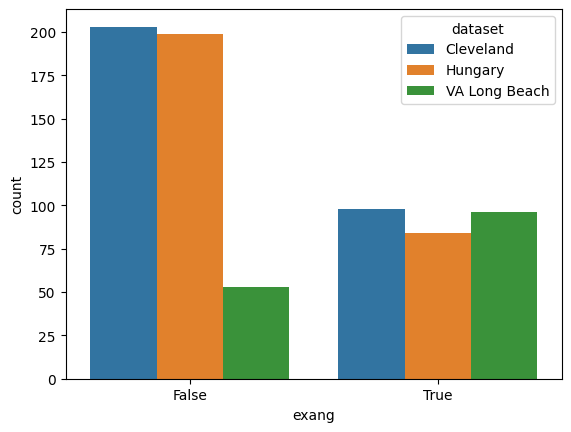

In [242]:
sns.countplot(data=df, x='exang', hue='dataset')
fig = px.histogram(data_frame=df, x="dataset", color='exang')
fig.show()

<Axes: xlabel='exang', ylabel='count'>

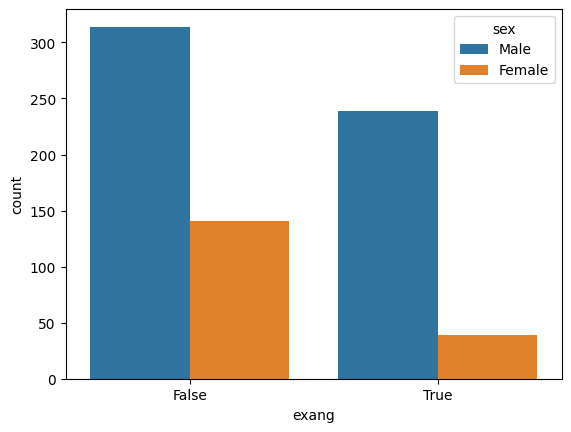

In [243]:
sns.countplot(data=df, x='exang', hue='sex')

#### THALCH Column

In [244]:
df.groupby('sex')['thalch'].value_counts()

sex     thalch
Female  130.0     9
        150.0     9
        160.0     8
        142.0     7
        140.0     6
                 ..
Male    177.0     1
        187.0     1
        190.0     1
        194.0     1
        202.0     1
Name: count, Length: 178, dtype: int64

In [245]:
df.groupby('dataset')['thalch'].value_counts()

dataset        thalch
Cleveland      162.0     11
               163.0      9
               152.0      8
               160.0      8
               125.0      7
                         ..
VA Long Beach  159.0      1
               161.0      1
               162.0      1
               165.0      1
               180.0      1
Name: count, Length: 210, dtype: int64

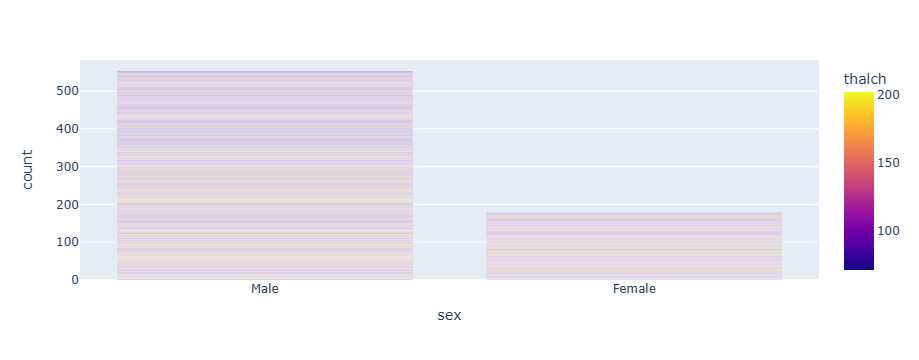

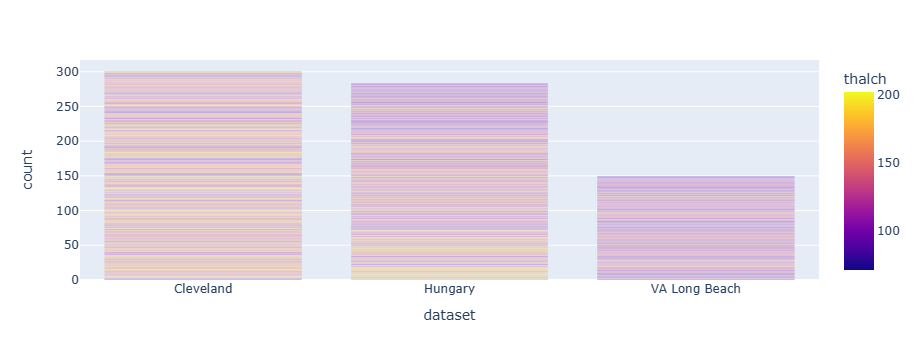

In [246]:
fig = px.bar(df, x='sex', color='thalch')
fig.show()

fig = px.bar(df, x='dataset', color='thalch')
fig.show()

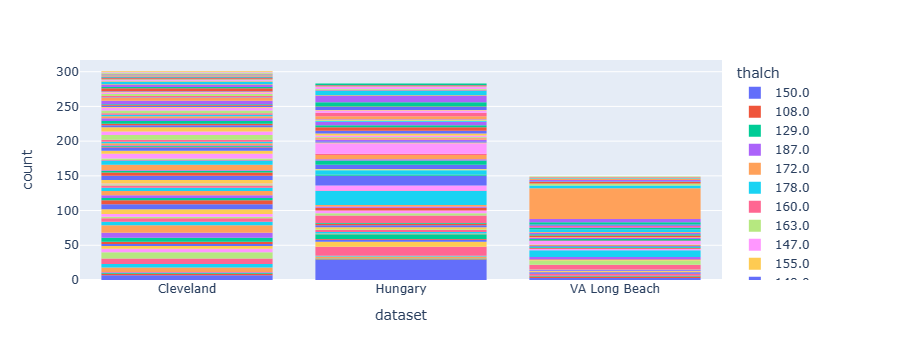

In [247]:
fig = px.histogram(data_frame=df, x="dataset", color='thalch')
fig.show()

Mean :  140.9953000181375
Median :  140.0
Mode :  137.5456647398844


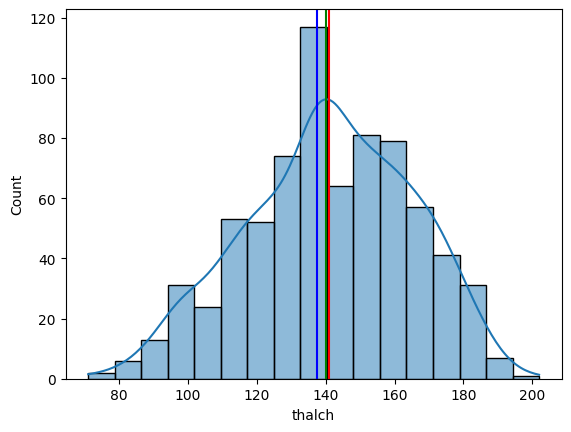

In [248]:
sns.histplot(df["thalch"], kde = True)
plt.axvline(df["thalch"].mean(), color="Red")
plt.axvline(df["thalch"].median(), color="Green")
plt.axvline(df["thalch"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["thalch"].mean())
print("Median : ", df["thalch"].median())
print("Mode : ", df["thalch"].mode()[0])

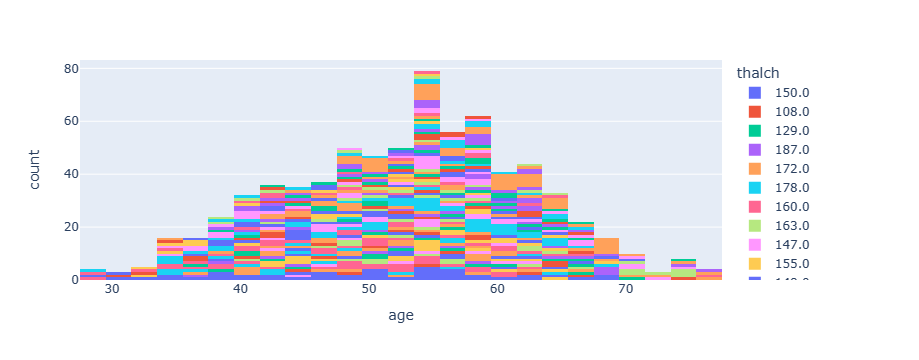

In [249]:
fig = px.histogram(data_frame=df, x="age", color='thalch')
fig

#### OLDPEAK Column

In [250]:
df.groupby('sex')['oldpeak'].value_counts()

sex     oldpeak
Female  0.0        93
        1.0        19
        2.0         9
        1.5         7
        0.2         6
                   ..
Male    3.1         1
        3.8         1
        4.4         1
        5.0         1
        5.6         1
Name: count, Length: 67, dtype: int64

In [251]:
df.groupby('dataset')['oldpeak'].value_counts()

dataset        oldpeak
Cleveland      0.0        99
               1.2        17
               0.6        14
               1.0        14
               0.8        13
                          ..
VA Long Beach  1.3         2
               0.8         1
               1.6         1
               1.7         1
               3.5         1
Name: count, Length: 64, dtype: int64

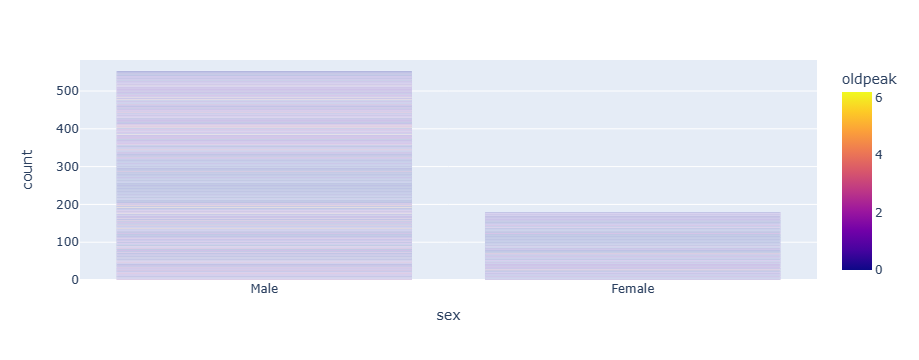

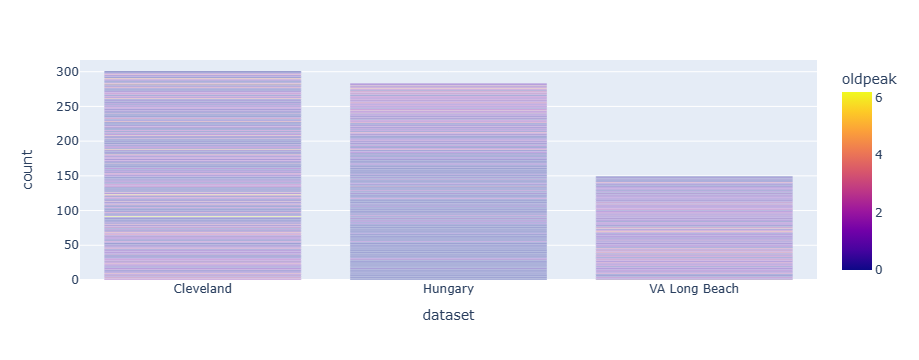

In [252]:
fig = px.bar(df, x='sex', color='oldpeak')
fig.show()

fig = px.bar(df, x='dataset', color='oldpeak')
fig.show()

Mean :  0.8897722105089091
Median :  0.6
Mode :  0.0


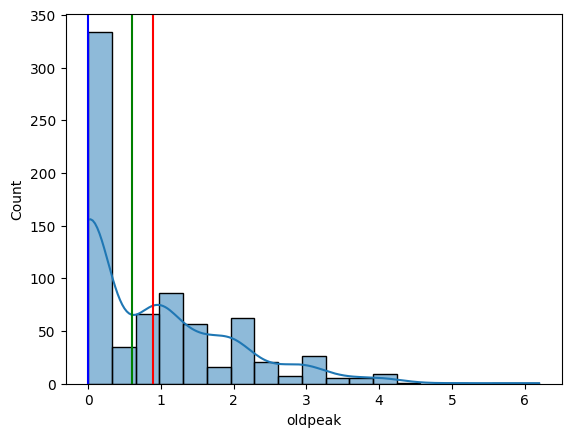

In [253]:
sns.histplot(df["oldpeak"], kde = True)
plt.axvline(df["oldpeak"].mean(), color="Red")
plt.axvline(df["oldpeak"].median(), color="Green")
plt.axvline(df["oldpeak"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["oldpeak"].mean())
print("Median : ", df["oldpeak"].median())
print("Mode : ", df["oldpeak"].mode()[0])

#### SLOPE Column

In [254]:
df.groupby('sex')['slope'].value_counts()

sex     slope      
Female  flat            91
        upsloping       85
        downsloping      4
Male    flat           331
        upsloping      183
        downsloping     39
Name: count, dtype: int64

In [255]:
df.groupby('dataset')['slope'].value_counts()

dataset        slope      
Cleveland      upsloping      142
               flat           139
               downsloping     20
Hungary        flat           167
               upsloping      115
               downsloping      1
VA Long Beach  flat           116
               downsloping     22
               upsloping       11
Name: count, dtype: int64

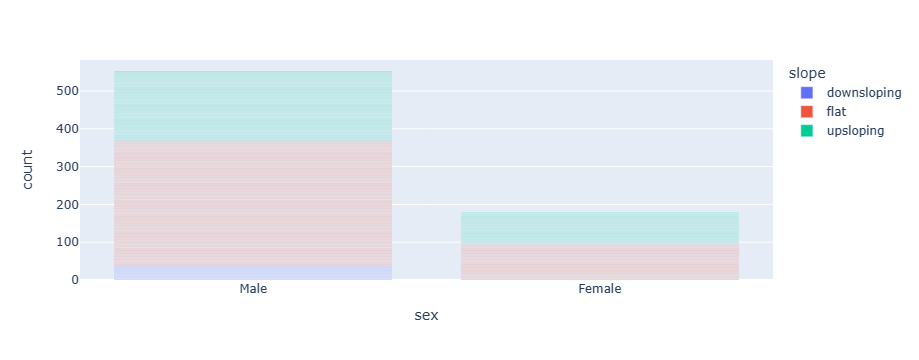

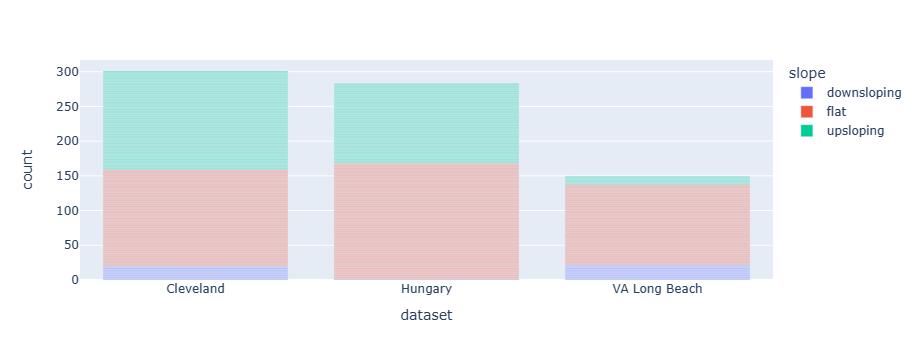

In [256]:
fig = px.bar(df, x='sex', color='slope')
fig.show()

fig = px.bar(df, x='dataset', color='slope')
fig.show()

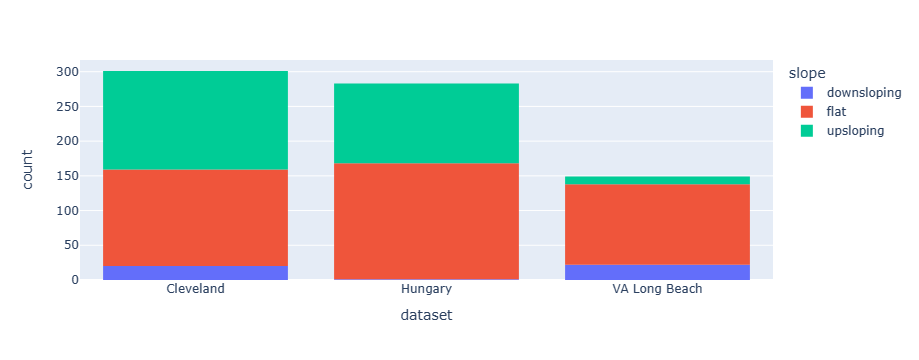

In [257]:
fig = px.histogram(data_frame=df, x="dataset", color='slope')
fig.show()

<Axes: xlabel='slope', ylabel='count'>

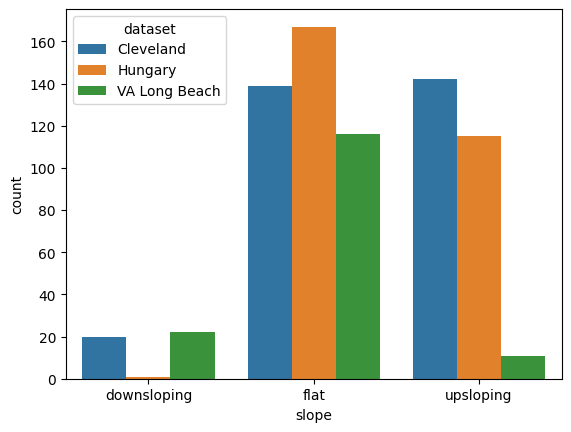

In [258]:
sns.countplot(data=df, x='slope', hue='dataset')

#### CA Column

In [259]:
df.groupby('sex')['ca'].value_counts()

sex     ca      
Female  0.676375     85
        0.000000     64
        1.000000     15
        2.000000     12
        3.000000      4
Male    0.676375    349
        0.000000    114
        1.000000     49
        2.000000     25
        3.000000     16
Name: count, dtype: int64

In [260]:
df.groupby('dataset')['ca'].value_counts()

dataset        ca      
Cleveland      0.000000    175
               1.000000     64
               2.000000     37
               3.000000     20
               0.676375      5
Hungary        0.676375    280
               0.000000      3
VA Long Beach  0.676375    149
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

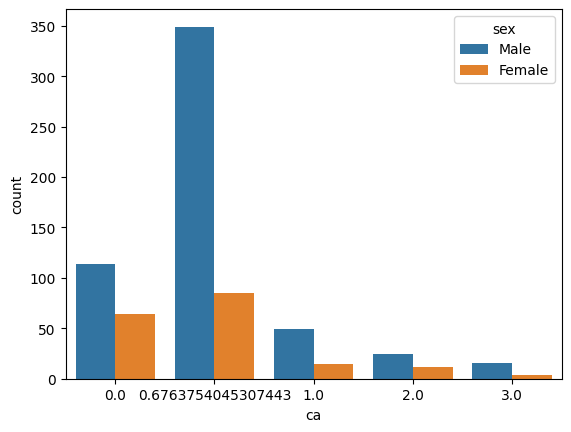

In [261]:
sns.countplot(data=df, x='ca', hue='sex')

<Axes: xlabel='ca', ylabel='count'>

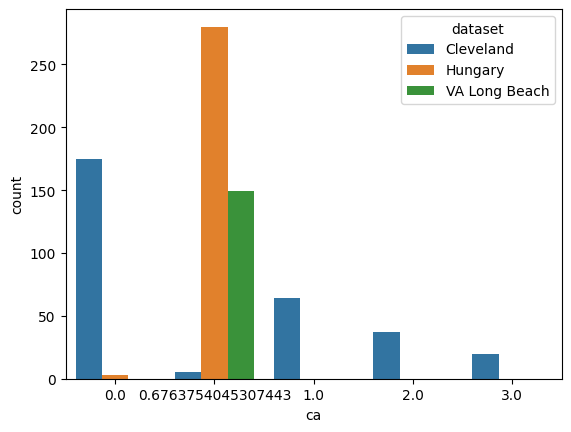

In [262]:
sns.countplot(data=df, x='ca', hue='dataset')

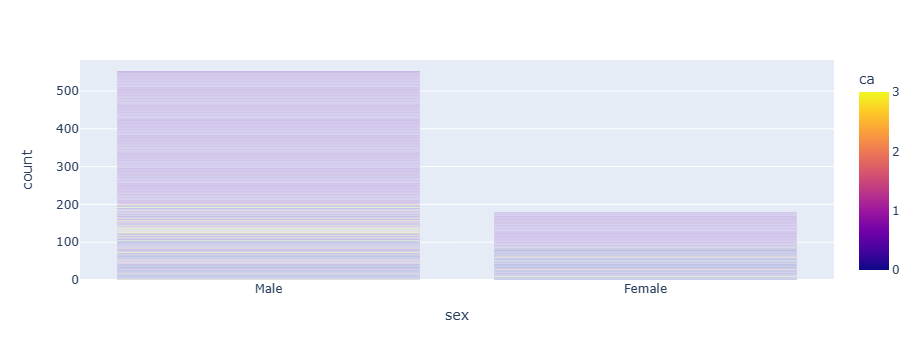

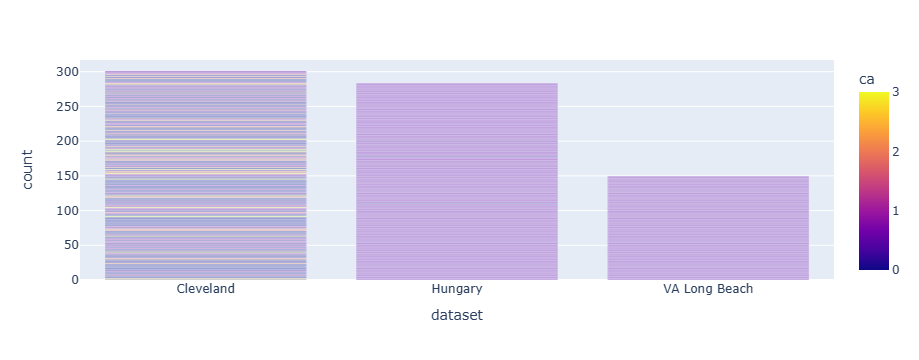

In [263]:
fig = px.bar(df, x='sex', color='ca')
fig.show()

fig = px.bar(df, x='dataset', color='ca')
fig.show()

#### THAL Column

In [264]:
df.groupby('sex')['thal'].value_counts()

sex     thal             
Female  normal               143
        reversable defect     33
        fixed defect           4
Male    reversable defect    319
        normal               173
        fixed defect          61
Name: count, dtype: int64

In [265]:
df.groupby('dataset')['thal'].value_counts()

dataset        thal             
Cleveland      normal               168
               reversable defect    115
               fixed defect          18
Hungary        reversable defect    133
               normal               130
               fixed defect          20
VA Long Beach  reversable defect    104
               fixed defect          27
               normal                18
Name: count, dtype: int64

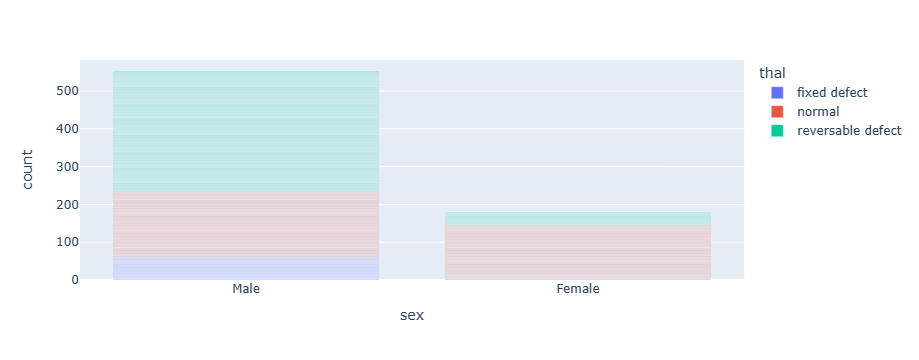

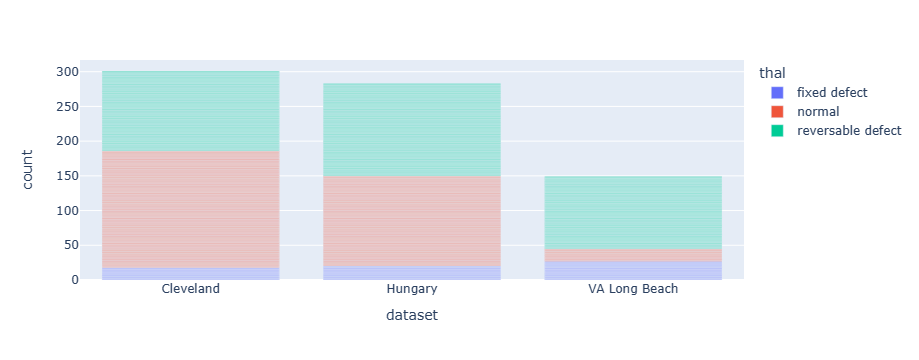

In [266]:
fig = px.bar(df, x='sex', color='thal')
fig.show()

fig = px.bar(df, x='dataset', color='thal')
fig.show()

<Axes: xlabel='thal', ylabel='count'>

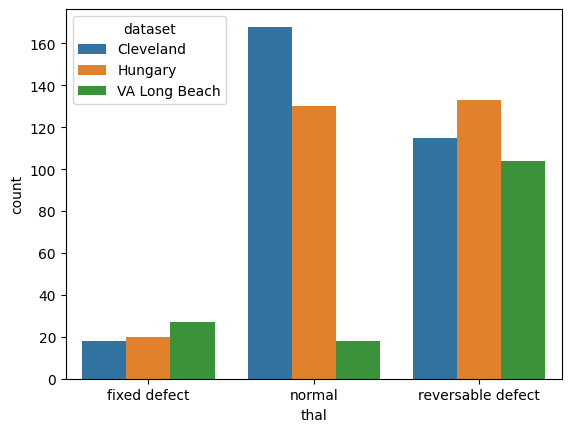

In [267]:
sns.countplot(data=df, x='thal', hue='dataset')

#### NUM Column
    0 = no heart disease
    1 = mild heart disease`
    2 = moderate heart disease
    3 = severe heart disease
    4 = critical heart disease

In [268]:
df.groupby('sex')['num'].value_counts()

sex     num
Female  0      141
        1       24
        2        7
        3        6
        4        2
Male    0      245
        1      170
        3       62
        2       56
        4       20
Name: count, dtype: int64

In [269]:
df.groupby('dataset')['num'].value_counts()

dataset        num
Cleveland      0      164
               1       54
               2       36
               3       34
               4       13
Hungary        0      184
               1       99
VA Long Beach  1       41
               0       38
               3       34
               2       27
               4        9
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='count'>

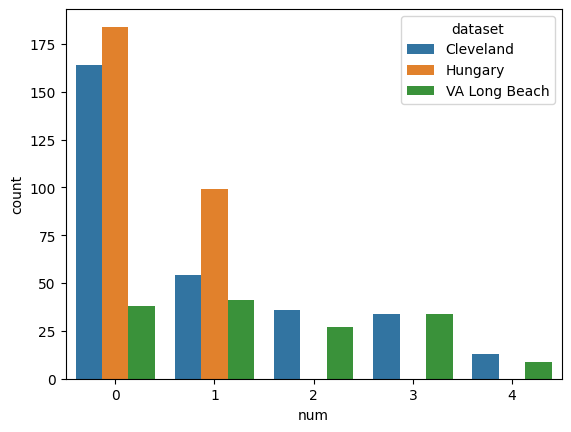

In [270]:
sns.countplot(data=df, x='num', hue='dataset')

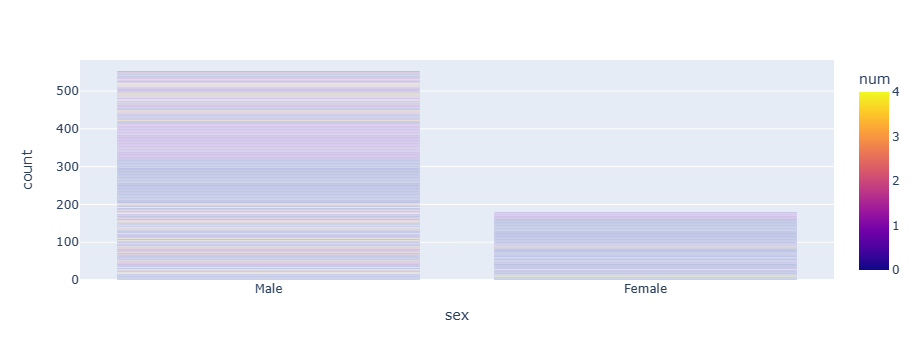

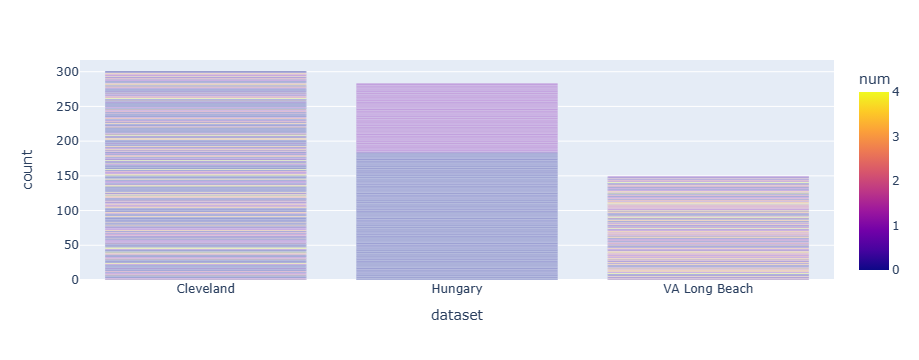

In [271]:
fig = px.bar(df, x='sex', color='num')
fig.show()

fig = px.bar(df, x='dataset', color='num')
fig.show()

## Data Transformation

### Label Encoding

In [ ]:
"""# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for 'thal' column
label_encoder_thal = LabelEncoder()

# Apply LabelEncoder to 'thal' column in the DataFrame
df['thal'] = label_encoder_thal.fit_transform(df['thal'])
df['sex'] = label_encoder_thal.fit_transform(df['sex'])
df['dataset'] = label_encoder_thal.fit_transform(df['dataset'])
df['cp'] = label_encoder_thal.fit_transform(df['cp'])
df['fbs'] = label_encoder_thal.fit_transform(df['fbs'])
df['restecg'] = label_encoder_thal.fit_transform(df['restecg'])
df['exang'] = label_encoder_thal.fit_transform(df['exang'])
df['slope'] = label_encoder_thal.fit_transform(df['slope'])"""

In [272]:
le1 =LabelEncoder()

df['thal']= le1.fit_transform(df['thal'])

In [273]:
le1 =LabelEncoder()

df['slope']= le1.fit_transform(df['slope'])

In [274]:
le1 =LabelEncoder()

df['restecg']= le1.fit_transform(df['restecg'])

In [275]:
le1 =LabelEncoder()

df['fbs']= le1.fit_transform(df['fbs'])

In [276]:
le1 =LabelEncoder()

df['cp']= le1.fit_transform(df['cp'])

In [277]:
le1 =LabelEncoder()

df['dataset']= le1.fit_transform(df['dataset'])

In [278]:
le1 =LabelEncoder()

df['sex']= le1.fit_transform(df['sex'])

In [279]:
le1 =LabelEncoder()

df['exang']= le1.fit_transform(df['exang'])
df.head()

id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0

## Statistical Analysis

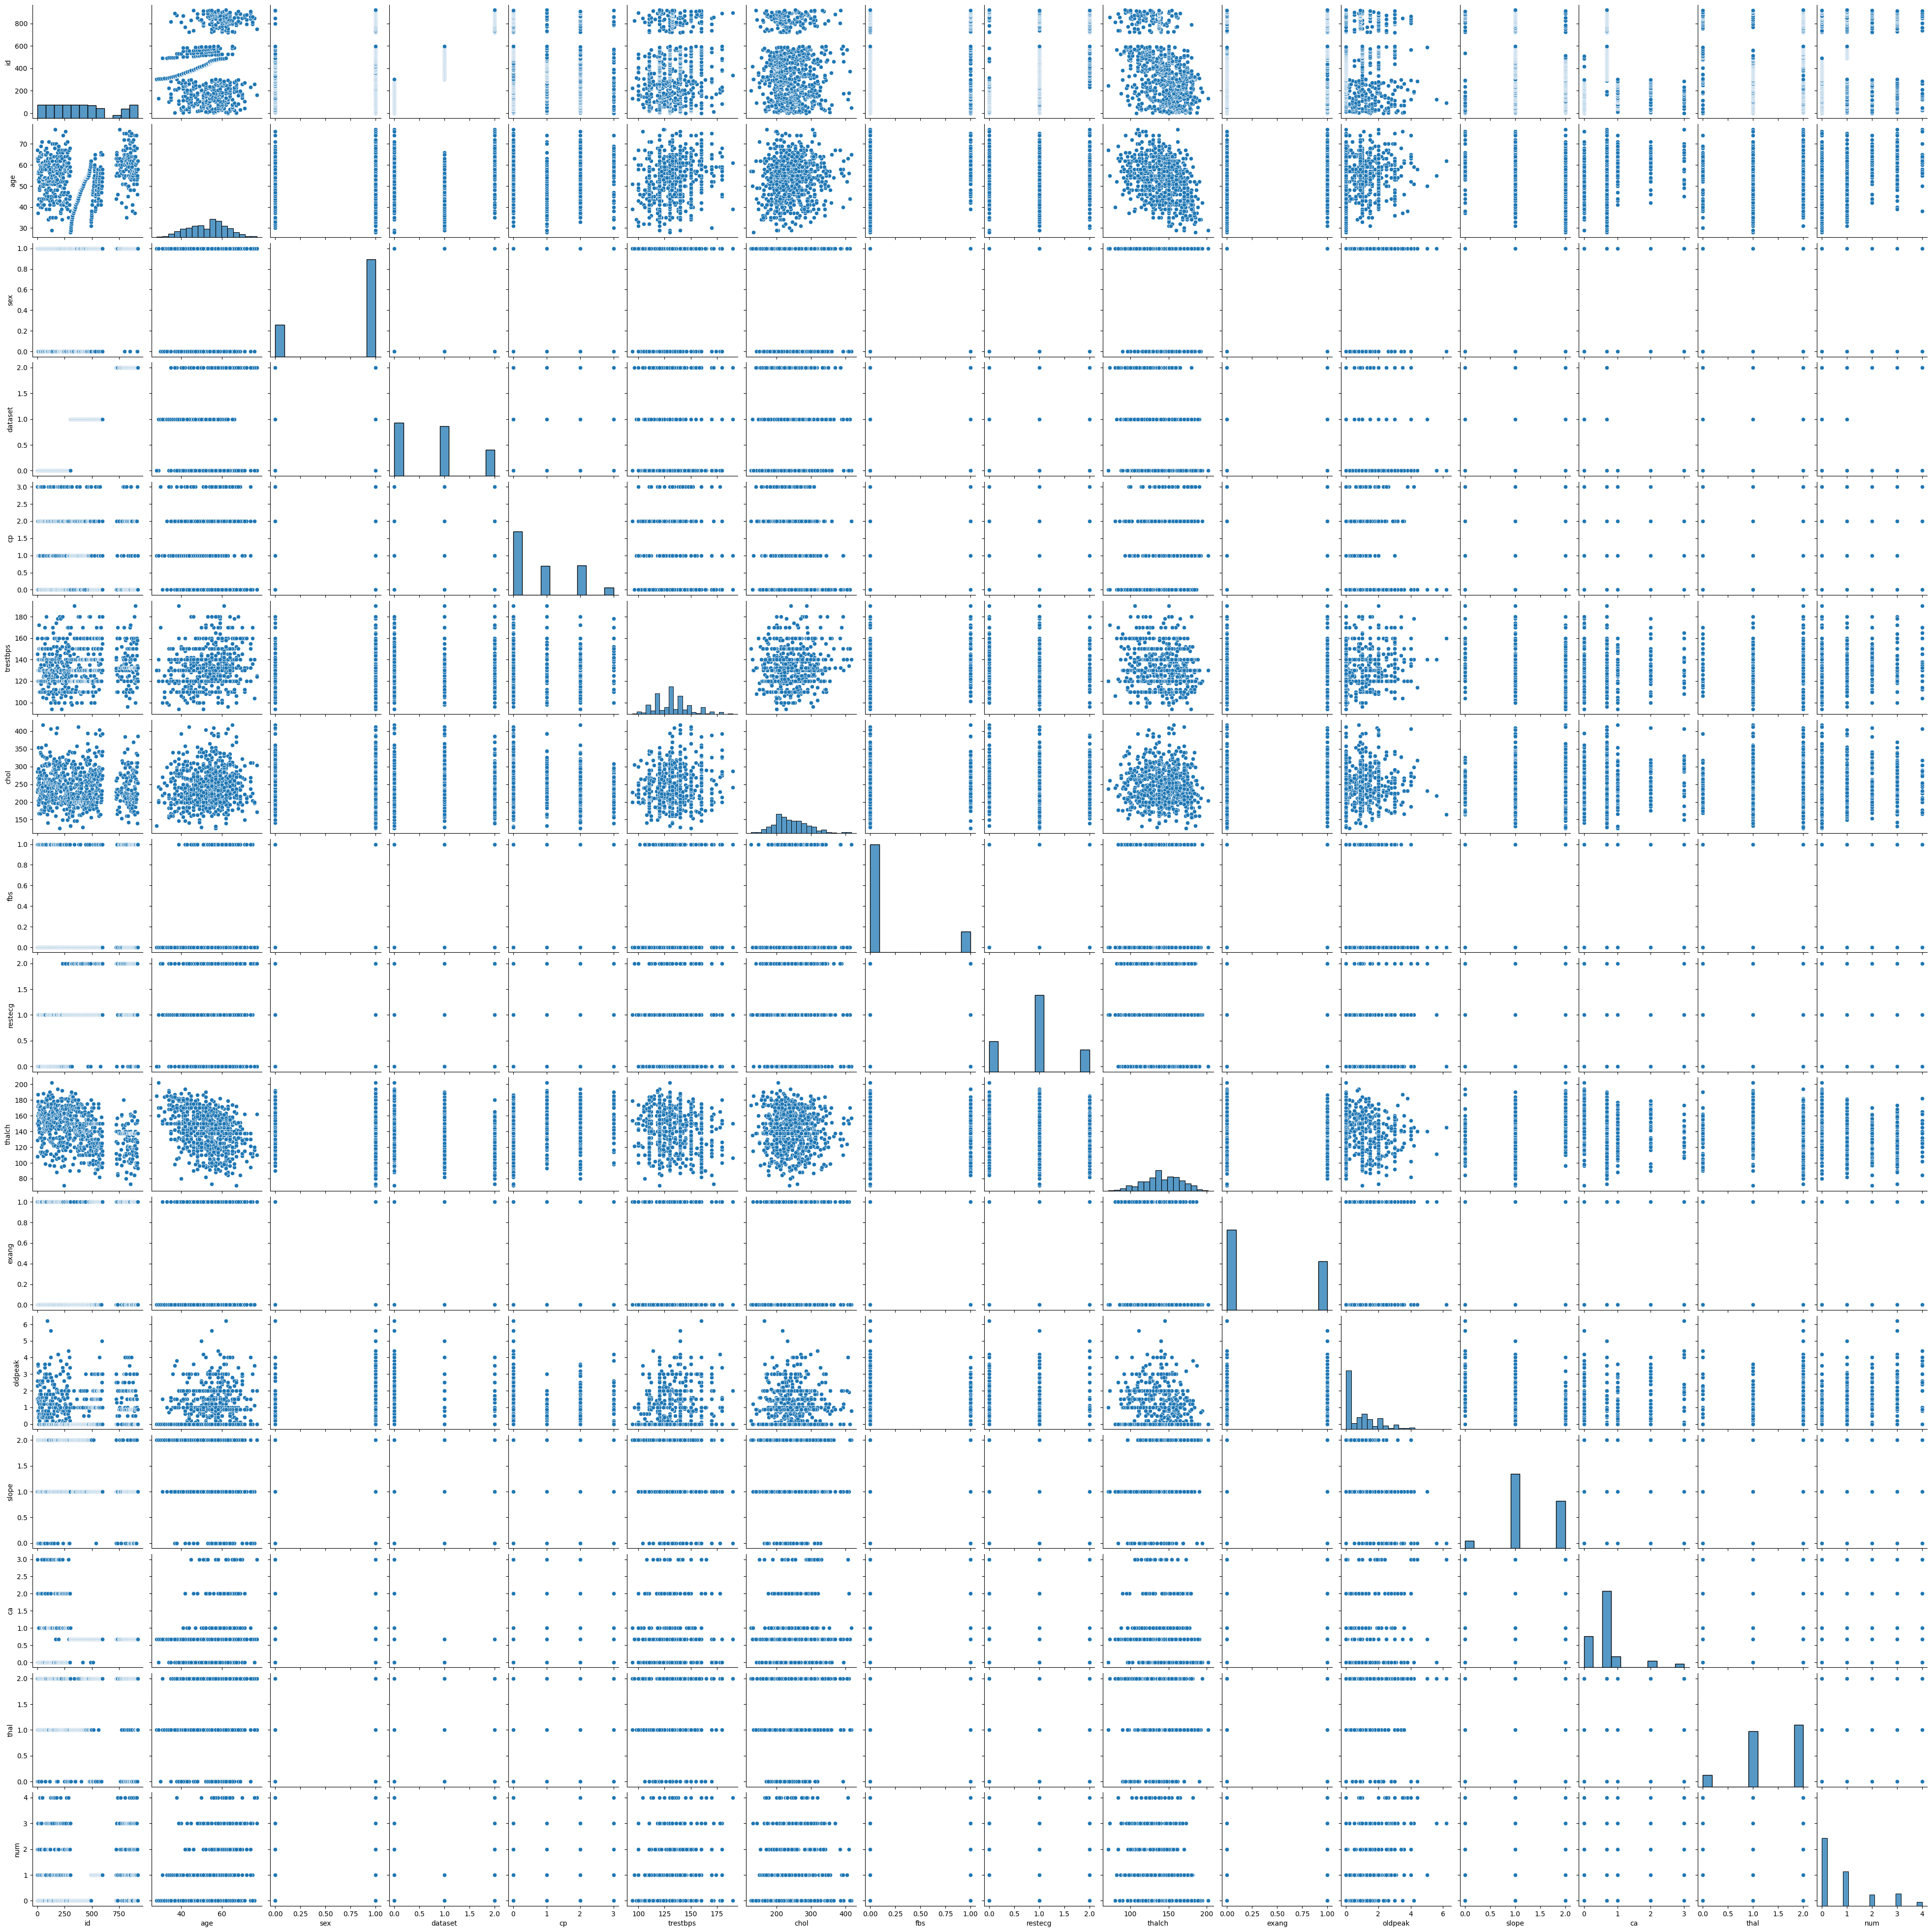

In [280]:
sns.pairplot(df)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        733 non-null    int64  
 1   age       733 non-null    int64  
 2   sex       733 non-null    int32  
 3   dataset   733 non-null    int32  
 4   cp        733 non-null    int32  
 5   trestbps  733 non-null    float64
 6   chol      733 non-null    float64
 7   fbs       733 non-null    int32  
 8   restecg   733 non-null    int32  
 9   thalch    733 non-null    float64
 10  exang     733 non-null    int32  
 11  oldpeak   733 non-null    float64
 12  slope     733 non-null    int32  
 13  ca        733 non-null    float64
 14  thal      733 non-null    int32  
 15  num       733 non-null    int64  
dtypes: float64(5), int32(8), int64(3)
memory usage: 74.4 KB


### Data Normalization

\\ Null Hypothesis: Data is Normal.

\\ Alternate Hypothesis: Data is not Normal.

p-value: 0.003918717399642707. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.070166723635522e-32. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.287818681055507e-34. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 3.780762417043808e-05. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.222561016049809e-28. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 2.71392070016384e-11. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 1.392914019055046e-09. Sample does not look Gaussian/Normally distributed (Reject H0)


id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0

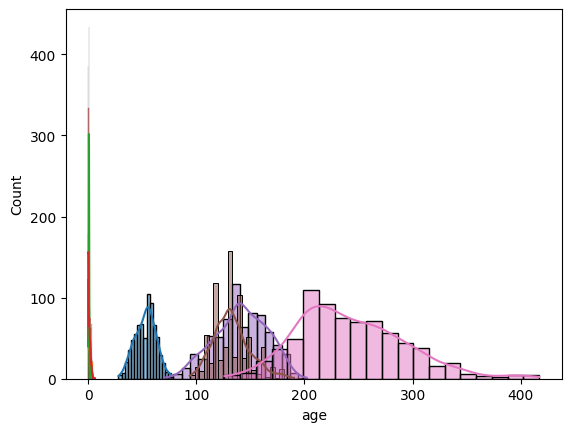

In [282]:
sns.histplot(df["age"], kde=1)
sns.histplot(df["num"], kde=1)
sns.histplot(df["ca"], kde=1)
sns.histplot(df["oldpeak"], kde=1)
sns.histplot(df["thalch"], kde=1)
sns.histplot(df["trestbps"], kde=1)
sns.histplot(df["chol"], kde=1)

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["age"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["num"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["ca"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["thalch"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["oldpeak"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["trestbps"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["chol"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')
df.head()

In [283]:
df = df.drop(columns=['id'])

In [284]:

columns_to_convert = ['age', 'trestbps', 'chol', 'thalch', 'ca', 'num', 'oldpeak']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame after conversion
print(df)

     age  sex  dataset  cp    trestbps   chol  fbs  restecg      thalch  \
0     63    1        0   3  145.000000  233.0    1        0  150.000000   
1     67    1        0   0  160.000000  286.0    0        0  108.000000   
2     67    1        0   0  120.000000  229.0    0        0  129.000000   
3     37    1        0   2  130.000000  250.0    0        1  187.000000   
4     41    0        0   1  130.000000  204.0    0        0  172.000000   
..   ...  ...      ...  ..         ...    ...  ...      ...         ...   
915   54    0        2   0  127.000000  333.0    1        2  154.000000   
916   62    1        2   3  132.132404  139.0    0        2  137.545665   
917   55    1        2   0  122.000000  223.0    1        2  100.000000   
918   58    1        2   0  132.132404  385.0    1        0  137.545665   
919   62    1        2   1  120.000000  254.0    0        0   93.000000   

     exang   oldpeak  slope        ca  thal  num  
0        0  2.300000      0  0.000000     0    0

In [285]:
"""x= df[['age', 'trestbps', 'chol','thalch', 'ca', 'num', 'oldpeak']]"""

In [286]:
"""from sklearn.preprocessing import QuantileTransformer

# Assuming 'x' is a DataFrame with columns 'age', 'trestbps', 'chol', 'thalch', 'ca', 'num', and 'oldpeak'
x = df[['age', 'trestbps', 'chol', 'thalch', 'ca', 'num', 'oldpeak']]

# Initialize QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')

# Fit and transform the data
transformed_x = qt_normal.fit_transform(x)

# Create a new DataFrame for transformed data
transformed_df = pd.DataFrame(transformed_x, columns=x.columns)

# Concatenate the transformed DataFrame with the original DataFrame
df = pd.concat([df, transformed_df], axis=1)
# Display the DataFrame
print(df)"""


"from sklearn.preprocessing import QuantileTransformer\n\n# Assuming 'x' is a DataFrame with columns 'age', 'trestbps', 'chol', 'thalch', 'ca', 'num', and 'oldpeak'\nx = df[['age', 'trestbps', 'chol', 'thalch', 'ca', 'num', 'oldpeak']]\n\n# Initialize QuantileTransformer\nqt_normal = QuantileTransformer(output_distribution='normal')\n\n# Fit and transform the data\ntransformed_x = qt_normal.fit_transform(x)\n\n# Create a new DataFrame for transformed data\ntransformed_df = pd.DataFrame(transformed_x, columns=x.columns)\n\n# Concatenate the transformed DataFrame with the original DataFrame\ndf = pd.concat([df, transformed_df], axis=1)\n# Display the DataFrame\nprint(df)"

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       733 non-null    int64  
 1   sex       733 non-null    int32  
 2   dataset   733 non-null    int32  
 3   cp        733 non-null    int32  
 4   trestbps  733 non-null    float64
 5   chol      733 non-null    float64
 6   fbs       733 non-null    int32  
 7   restecg   733 non-null    int32  
 8   thalch    733 non-null    float64
 9   exang     733 non-null    int32  
 10  oldpeak   733 non-null    float64
 11  slope     733 non-null    int32  
 12  ca        733 non-null    float64
 13  thal      733 non-null    int32  
 14  num       733 non-null    int64  
dtypes: float64(5), int32(8), int64(2)
memory usage: 68.7 KB


In [288]:
# Check for missing values (NaNs) in the DataFrame
missing_values = df.isna().any()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
age         False
sex         False
dataset     False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool


In [289]:
# Drop rows with NaN values
df.dropna(inplace=True)

# Display the DataFrame after dropping rows with NaN values
print(df)


     age  sex  dataset  cp    trestbps   chol  fbs  restecg      thalch  \
0     63    1        0   3  145.000000  233.0    1        0  150.000000   
1     67    1        0   0  160.000000  286.0    0        0  108.000000   
2     67    1        0   0  120.000000  229.0    0        0  129.000000   
3     37    1        0   2  130.000000  250.0    0        1  187.000000   
4     41    0        0   1  130.000000  204.0    0        0  172.000000   
..   ...  ...      ...  ..         ...    ...  ...      ...         ...   
915   54    0        2   0  127.000000  333.0    1        2  154.000000   
916   62    1        2   3  132.132404  139.0    0        2  137.545665   
917   55    1        2   0  122.000000  223.0    1        2  100.000000   
918   58    1        2   0  132.132404  385.0    1        0  137.545665   
919   62    1        2   1  120.000000  254.0    0        0   93.000000   

     exang   oldpeak  slope        ca  thal  num  
0        0  2.300000      0  0.000000     0    0

In [295]:
from sklearn.preprocessing import MaxAbsScaler

# Selecting the columns you want to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'ca', 'num', 'oldpeak']
data_to_scale = df[columns_to_scale]

# Initialize the scaler
scaler = MaxAbsScaler()

# Fit and transform the selected data
scaled_data = scaler.fit_transform(data_to_scale)

# Replace the original columns with the scaled ones
df[columns_to_scale] = scaled_data

print(df)


          age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0    0.818182    1        0   3  0.763158  0.558753    1        0  0.742574   
1    0.870130    1        0   0  0.842105  0.685851    0        0  0.534653   
2    0.870130    1        0   0  0.631579  0.549161    0        0  0.638614   
3    0.480519    1        0   2  0.684211  0.599520    0        1  0.925743   
4    0.532468    0        0   1  0.684211  0.489209    0        0  0.851485   
..        ...  ...      ...  ..       ...       ...  ...      ...       ...   
915  0.701299    0        2   0  0.668421  0.798561    1        2  0.762376   
916  0.805195    1        2   3  0.695434  0.333333    0        2  0.680919   
917  0.714286    1        2   0  0.642105  0.534772    1        2  0.495050   
918  0.753247    1        2   0  0.695434  0.923261    1        0  0.680919   
919  0.805195    1        2   1  0.631579  0.609113    0        0  0.460396   

     exang   oldpeak  slope        ca  thal   num  

Shapiro Test
ShapiroResult(statistic=0.9937587963210146, pvalue=0.003918717399645792)
ShapiroResult(statistic=0.7459325937728893, pvalue=5.070166723635522e-32)
ShapiroResult(statistic=0.7031417439593077, pvalue=5.287818681055507e-34)
ShapiroResult(statistic=0.8176245129968879, pvalue=5.222561016049809e-28)
ShapiroResult(statistic=0.9893822731664078, pvalue=3.780762417043808e-05)
ShapiroResult(statistic=0.9692322901699558, pvalue=2.7139207001649043e-11)
ShapiroResult(statistic=0.9760755872942823, pvalue=1.3929140190553612e-09)
p-value: 0.003918717399645792. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.070166723635522e-32. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.287818681055507e-34. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 3.780762417043808e-05. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 5.222561016049809e-28. Sample does not look Gaussian/Normally distributed (Rejec

age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0  0.818182    1        0   3  0.763158  0.558753    1        0  0.742574   
1  0.870130    1        0   0  0.842105  0.685851    0        0  0.534653   
2  0.870130    1        0   0  0.631579  0.549161    0        0  0.638614   
3  0.480519    1        0   2  0.684211  0.599520    0        1  0.925743   
4  0.532468    0        0   1  0.684211  0.489209    0        0  0.851485   

   exang   oldpeak  slope        ca  thal   num  
0      0  0.370968      0  0.000000     0  0.00  
1      1  0.241935      1  1.000000     1  0.50  
2      1  0.419355      1  0.666667     2  0.25  
3      0  0.564516      0  0.000000     1  0.00  
4      0  0.225806      2  0.000000     1  0.00

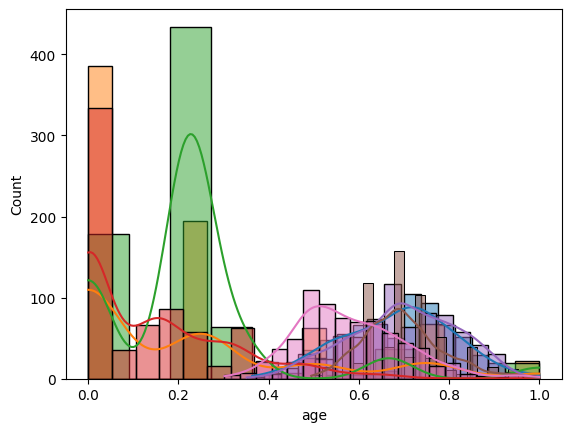

In [296]:
print('Shapiro Test')
print(stats.shapiro(df["age"]))
print(stats.shapiro(df["num"]))
print(stats.shapiro(df["ca"]))
print(stats.shapiro(df["oldpeak"]))
print(stats.shapiro(df["thalch"]))
print(stats.shapiro(df["trestbps"]))
print(stats.shapiro(df["chol"]))


sns.histplot(df["age"], kde=1)
sns.histplot(df["num"], kde=1)
sns.histplot(df["ca"], kde=1)
sns.histplot(df["oldpeak"], kde=1)
sns.histplot(df["thalch"], kde=1)
sns.histplot(df["trestbps"], kde=1)
sns.histplot(df["chol"], kde=1)

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["age"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["num"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["ca"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["thalch"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["oldpeak"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["trestbps"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["chol"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')
df.head()

### Homoginity Test

#### Levene Test

\\ Null Hypothesis: Data is Homoginious.

\\ Alternate Hypothesis: Data is not Homoginious.

In [297]:
age_col =(df["age"])
num_col = (df["num"])
ca_col = (df["ca"])
oldpeak_col =(df["oldpeak"])
thalch_col = (df["thalch"])
trestbps_col =(df["trestbps"])
chol_col = (df["chol"])
# Perform Levene Test
w_stat, p_val = stats.levene(age_col, num_col, ca_col, oldpeak_col, thalch_col, trestbps_col, chol_col)

print("w_statistic:", w_stat)
print("p-value:", p_val)

if p_val < 0.05:  # Assuming alpha level of 0.05
    print(f"Variances are equal: Fail to Reject the null hypothesis")
else:
    print(f"Variances are not equal: Reject the null hypothesis")

w_statistic: 77.65302307116893
p-value: 3.3727381301240716e-93
Variances are equal: Fail to Reject the null hypothesis


### Chi-Squared

#### Dataset Column

In [298]:
contigency_table1 = pd.crosstab(df["sex"], df["dataset"])
contigency_table1

dataset    0    1    2
sex                   
0         95   80    5
1        206  203  144

In [299]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table1)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 46.22663647761702
p-value: 9.162488243724954e-11
Degrees of Freedom: 2
Expected: [[ 73.9154161  69.4952251  36.5893588]
 [227.0845839 213.5047749 112.4106412]]


#### cp Column

In [300]:
contigency_table2 = pd.crosstab(df["sex"], df["cp"])
contigency_table2

cp     0    1    2   3
sex                   
0     61   59   51   9
1    299  105  117  32

In [301]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table2)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 26.003856608770455
p-value: 9.519690704863054e-06
Degrees of Freedom: 3
Expected: [[ 88.40381992  40.2728513   41.25511596  10.06821282]
 [271.59618008 123.7271487  126.74488404  30.93178718]]


#### fbs Column

In [302]:
contigency_table3 = pd.crosstab(df["sex"], df["fbs"])
contigency_table3

fbs    0    1
sex          
0    162   18
1    452  101

In [303]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table3)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 6.2255946790060355
p-value: 0.012591661189565034
Degrees of Freedom: 1
Expected: [[150.77762619  29.22237381]
 [463.22237381  89.77762619]]


#### Restecg Column

In [304]:
contigency_table4 = pd.crosstab(df["sex"], df["restecg"])
contigency_table4

restecg    0    1    2
sex                   
0         45  109   26
1        128  325  100

In [305]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table4)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 1.3167615565875184
p-value: 0.5176889093180759
Degrees of Freedom: 2
Expected: [[ 42.48294679 106.57571623  30.94133697]
 [130.51705321 327.42428377  95.05866303]]


#### Slope Column

In [306]:
contigency_table5 = pd.crosstab(df["sex"], df["slope"])
contigency_table5

slope   0    1    2
sex                
0       4   91   85
1      39  331  183

In [307]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table5)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 14.856472866624742
p-value: 0.0005942345606416635
Degrees of Freedom: 2
Expected: [[ 10.55934516 103.62892224  65.81173261]
 [ 32.44065484 318.37107776 202.18826739]]


#### Thal Column

In [308]:
contigency_table6 = pd.crosstab(df["sex"], df["thal"])
contigency_table6

thal   0    1    2
sex               
0      4  143   33
1     61  173  319

In [309]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table6)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 128.73571396272172
p-value: 1.1101838391565923e-28
Degrees of Freedom: 2
Expected: [[ 15.96180082  77.59890859  86.43929059]
 [ 49.03819918 238.40109141 265.56070941]]


#### Exang Column

In [310]:
contigency_table7 = pd.crosstab(df["sex"], df["exang"])
contigency_table7

exang    0    1
sex            
0      141   39
1      314  239

In [311]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table7)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 25.885654252207797
p-value: 3.622513295627636e-07
Degrees of Freedom: 1
Expected: [[111.73260573  68.26739427]
 [343.26739427 209.73260573]]


### Wilcoxon (Paired Sampling)

In [312]:
from scipy.stats import wilcoxon

age_column =(df["age"])
num_column = (df["num"])
ca_column = (df["ca"])
oldpeak_column =(df["oldpeak"])
thalch_column = (df["thalch"])
trestbps_column =(df["trestbps"])
chol_column = (df["chol"])

statistic_1, p_val_1 = wilcoxon(age_column, num_column)
print("Test statistic between age and num:", statistic_1)
print("p-value between age and num:", p_val_1)

statistic_2, p_val_2 = wilcoxon(age_column, ca_column)
print("\nTest statistic between age and ca:", statistic_2)
print("p-value between age and ca:", p_val_2)

statistic_3, p_val_3 = wilcoxon(age_column, oldpeak_column)
print("\nTest statistic between age and oldpeak:", statistic_3)
print("p-value between age and oldpeak:", p_val_3)

statistic_1, p_val_4 = wilcoxon(age_column, thalch_column)
print("Test statistic between age and thalch:", statistic_1)
print("p-value between age and thalch:", p_val_1)

statistic_1, p_val_5 = wilcoxon(age_column, trestbps_column)
print("Test statistic between age and trestbps:", statistic_1)
print("p-value between age and trestbps:", p_val_1)

statistic_1, p_val_6 = wilcoxon(age_column, chol_column)
print("Test statistic between age and chol:", statistic_1)
print("p-value between age and chol:", p_val_1)

alpha = 0.05  # Significance level

# Checking each pair of columns separately
if p_val_1 < alpha:
    print("There is a significant difference between age and num columns.")
else:
    print("There is no significant difference between age and num columns.")

if p_val_2 < alpha:
    print("There is a significant difference between age and ca columns.")
else:
    print("There is no significant difference between age and ca columns.")

if p_val_3 < alpha:
    print("There is a significant difference between age and oldpeak columns.")
else:
    print("There is no significant difference between age and oldpeak columns.")

if p_val_4 < alpha:
    print("There is a significant difference between age and thalch columns.")
else:
    print("There is no significant difference between age and thalch columns.")

if p_val_5 < alpha:
    print("There is a significant difference between age and trestbps columns.")
else:
    print("There is no significant difference between age and trestbps columns.")

if p_val_6 < alpha:
    print("There is a significant difference between age and chol columns.")
else:
    print("There is no significant difference between age and chol columns.")


Test statistic between age and num: 3271.0
p-value between age and num: 9.710406540755523e-116

Test statistic between age and ca: 1673.0
p-value between age and ca: 1.5496889988477226e-118

Test statistic between age and oldpeak: 96.0
p-value between age and oldpeak: 1.7395271857079723e-121
Test statistic between age and thalch: 129116.0
p-value between age and thalch: 9.710406540755523e-116
Test statistic between age and trestbps: 122737.0
p-value between age and trestbps: 9.710406540755523e-116
Test statistic between age and chol: 48323.0
p-value between age and chol: 9.710406540755523e-116
There is a significant difference between age and num columns.
There is a significant difference between age and ca columns.
There is a significant difference between age and oldpeak columns.
There is no significant difference between age and thalch columns.
There is a significant difference between age and trestbps columns.
There is a significant difference between age and chol columns.


### Correlation

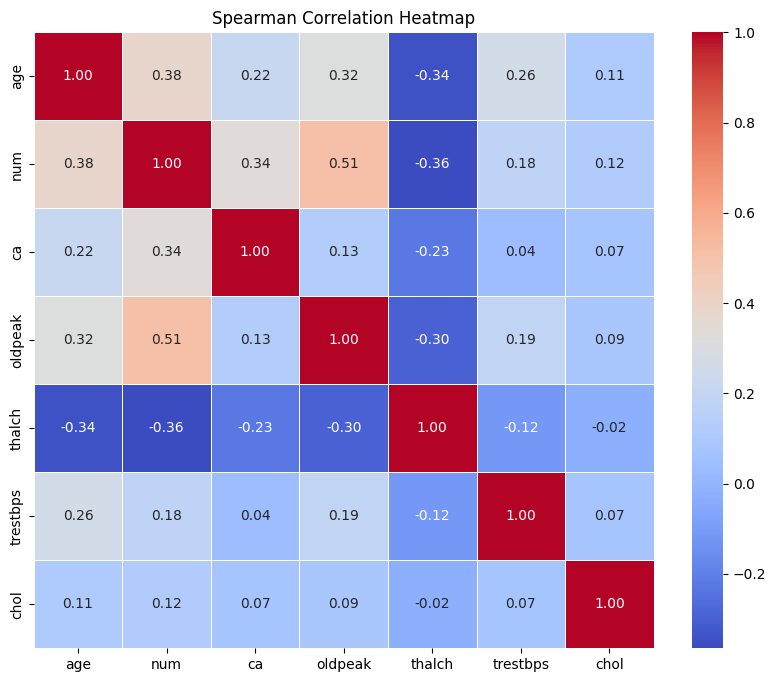

In [313]:
# Assuming you have already loaded your DataFrame 'df' and selected the desired columns
selected_columns = ["age", "num", "ca", "oldpeak", "thalch", "trestbps", "chol"]
selected_df = df[selected_columns]

# Calculate Spearman correlation matrix
correlation_matrix = selected_df.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

## Machine Learning

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       733 non-null    float64
 1   sex       733 non-null    int32  
 2   dataset   733 non-null    int32  
 3   cp        733 non-null    int32  
 4   trestbps  733 non-null    float64
 5   chol      733 non-null    float64
 6   fbs       733 non-null    int32  
 7   restecg   733 non-null    int32  
 8   thalch    733 non-null    float64
 9   exang     733 non-null    int32  
 10  oldpeak   733 non-null    float64
 11  slope     733 non-null    int32  
 12  ca        733 non-null    float64
 13  thal      733 non-null    int32  
 14  num       733 non-null    float64
dtypes: float64(7), int32(8)
memory usage: 68.7 KB


### Define Features and Labels

In [315]:
# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']

# Encode X data using separate label encoder for all categorical columns, and save it for inverse transform
label_encoder = LabelEncoder()
for column in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

### Train Test Split

In [316]:
# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']

# Spilit the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [318]:
df.head()

age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0  0.818182    1        0   3  0.763158  0.558753    1        0  0.742574   
1  0.870130    1        0   0  0.842105  0.685851    0        0  0.534653   
2  0.870130    1        0   0  0.631579  0.549161    0        0  0.638614   
3  0.480519    1        0   2  0.684211  0.599520    0        1  0.925743   
4  0.532468    0        0   1  0.684211  0.489209    0        0  0.851485   

   exang   oldpeak  slope        ca  thal   num  
0      0  0.370968      0  0.000000     0  0.00  
1      1  0.241935      1  1.000000     1  0.50  
2      1  0.419355      1  0.666667     2  0.25  
3      0  0.564516      0  0.000000     1  0.00  
4      0  0.225806      2  0.000000     1  0.00

Enlist all Machine Learning Model
    1. Logistic Regression
    2.  KNN
    3.  NB
    4.  SVM
    5.  Decision Tree 
    6.  Random Forest
    7.  XGBoost
    8.  lightGB
    9. AdaBoost
    10. Gradient

### Evalaution Metrics

In [325]:
models = {
            'Linear Regression' : LinearRegression(),
            'Decision Tree Regressor' : DecisionTreeRegressor(),
            'SVR' : SVR(),
            'Random Forest Regressor' : RandomForestRegressor(),
            'KNeighborsRegressor' : KNeighborsRegressor(),
            'GradientBoostingRegressor' : GradientBoostingRegressor(),
            'XGBRegressor' : XGBRegressor()
}

model_scores = []
for name, model in models.items():
    ## Fit x_train and y_train in the model 
    model.fit(X_train, y_train)

    ## make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))


    ## print the performing metric
    #print('All the Metrics applied on Algorithm')
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

    ## Selecting the best model from all above models
#sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=True)   ## Here 'reverse = True' because the maximum value is the best model
#for model in sorted_models:
    #print('All Algorithms Mean Absolute Error')
 #   print('Mean Absolute Error:', f"{model[0]} is {model[1]: .2f}")


Linear Regression MSE:  0.04590357501706198
Linear Regression R2:  0.4131714128827788
Linear Regression MAE:  0.1577865645830911


Decision Tree Regressor MSE:  0.07755681818181819
Decision Tree Regressor R2:  0.008518225039619742
Decision Tree Regressor MAE:  0.16477272727272727


SVR MSE:  0.044424221731411556
SVR R2:  0.43208337776008476
SVR MAE:  0.15009387238726055


Random Forest Regressor MSE:  0.04109306818181818
Random Forest Regressor R2:  0.474668647649234
Random Forest Regressor MAE:  0.14200000000000002


KNeighborsRegressor MSE:  0.04180681818181819
KNeighborsRegressor R2:  0.4655441098784997
KNeighborsRegressor MAE:  0.13068181818181818


GradientBoostingRegressor MSE:  0.04366535004839904
GradientBoostingRegressor R2:  0.44178474845681104
GradientBoostingRegressor MAE:  0.1439802704304401


XGBRegressor MSE:  0.04715917742721062
XGBRegressor R2:  0.3971198659595897
XGBRegressor MAE:  0.15333735559344694




### Best Model Selection as Per Evaluation Metrics

In [328]:
"""models = {
            'Linear Regression' : LinearRegression(),
            'Decision Tree Regressor' : DecisionTreeRegressor(),
            'SVR' : SVR(),
            'Random Forest Regressor' : RandomForestRegressor(),
            'KNeighborsRegressor' : KNeighborsRegressor(),
            'GradientBoostingRegressor' : GradientBoostingRegressor(),
            'XGBRegressor' : XGBRegressor()
}

best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models.items():  # Change here
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))"""

'models = {\n            \'Linear Regression\' : LinearRegression(),\n            \'Decision Tree Regressor\' : DecisionTreeRegressor(),\n            \'SVR\' : SVR(),\n            \'Random Forest Regressor\' : RandomForestRegressor(),\n            \'KNeighborsRegressor\' : KNeighborsRegressor(),\n            \'GradientBoostingRegressor\' : GradientBoostingRegressor(),\n            \'XGBRegressor\' : XGBRegressor()\n}\n\nbest_accuracy = 0.0\n\n# Iterate over the models and evaluate their performance\nfor name, model in models.items():  # Change here\n    # Create a pipeline for each model\n    pipeline = Pipeline([\n        # (\'imputer\', SimpleImputer(strategy=\'most_frequent\')),\n        # (\'encoder\', OneHotEncoder(handle_unknown=\'ignore\')),\n        (\'model\', model)\n    ])\n\n    # Perform cross-validation\n    scores = cross_val_score(pipeline, X_train, y_train, cv=5)\n    \n    # Calculate mean accuracy\n    mean_accuracy = scores.mean()\n    \n    # Fit the pipeline on th

### Hyperparameter Tuning

In [331]:
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

for name, (model, params) in models.items():
      ## Create a Pipeline
    pipeline= GridSearchCV(model, params, cv=5)

    ## Fit x_train and y_train in the model 
    pipeline.fit(X_train, y_train)

    ## make prediction from each model
    y_pred = pipeline.predict(X_test)

    ## print the performing metric
    #print('All the Metrics applied on Algorithm')
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')
    

Linear Regression MSE:  0.04590357501706198
Linear Regression R2:  0.4131714128827788
Linear Regression MAE:  0.1577865645830911


Decision Tree Regressor MSE:  0.05348028732192422
Decision Tree Regressor R2:  0.3163111710562251
Decision Tree Regressor MAE:  0.14739197802657725


SVR MSE:  0.044424221731411556
SVR R2:  0.43208337776008476
SVR MAE:  0.15009387238726055


Random Forest Regressor MSE:  0.04065414772727272
Random Forest Regressor R2:  0.48027978077126265
Random Forest Regressor MAE:  0.14065909090909093


KNeighborsRegressor MSE:  0.040254038317054854
KNeighborsRegressor R2:  0.48539475579887625
KNeighborsRegressor MAE:  0.1331611570247934


GradientBoostingRegressor MSE:  0.043979117255999886
GradientBoostingRegressor R2:  0.4377735670389873
GradientBoostingRegressor MAE:  0.1444744542402838


XGBRegressor MSE:  0.04511896493597555
XGBRegressor R2:  0.42320182173766074
XGBRegressor MAE:  0.14525571964067321




In [333]:
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

best_models = {}  # Dictionary to store the best model for each algorithm

for name, (model, params) in models.items():
    # Create a Pipeline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # Fit x_train and y_train in the model 
    pipeline.fit(X_train, y_train)
    
    # Get the best parameters and the best estimator (model)
    best_params = pipeline.best_params_
    best_model = pipeline.best_estimator_
    
    # Store the best model for each algorithm
    best_models[name] = best_model
    
    # Make prediction from the best model
    y_pred = best_model.predict(X_test)
    
    # Print the performance metrics
    print(name, 'Best Parameters:', best_params)
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

Linear Regression Best Parameters: {}
Linear Regression MSE:  0.04590357501706198
Linear Regression R2:  0.4131714128827788
Linear Regression MAE:  0.1577865645830911


Decision Tree Regressor Best Parameters: {'max_depth': 5}
Decision Tree Regressor MSE:  0.05236426883138835
Decision Tree Regressor R2:  0.3305782854096154
Decision Tree Regressor MAE:  0.14408379971839894


SVR Best Parameters: {'kernel': 'rbf'}
SVR MSE:  0.044424221731411556
SVR R2:  0.43208337776008476
SVR MAE:  0.15009387238726055


Random Forest Regressor Best Parameters: {'n_estimators': 100}
Random Forest Regressor MSE:  0.04124053977272728
Random Forest Regressor R2:  0.47278337955625993
Random Forest Regressor MAE:  0.142625


KNeighborsRegressor Best Parameters: {'n_neighbors': 11}
KNeighborsRegressor MSE:  0.040254038317054854
KNeighborsRegressor R2:  0.48539475579887625
KNeighborsRegressor MAE:  0.1331611570247934


GradientBoostingRegressor Best Parameters: {'n_estimators': 100}
GradientBoostingRegressor MS

## Outputs:
      Age Column:
1. The Heart diseases starts from the age of 28.
2. The most of the people are effected by heart disease mostly at th age of 53-54.
3. Most of the males and females is affected by heart disease at the age of 54-55.
4. Male percentage in the data : ,78.91%
5. Female percentage in the data : ,21.09%
6. Male are : 274.23 more than female in the data
7. People mostly affected by heart disease are from Cleveland (304), Seconded by Hungary (293), Third is VA Long Beach (200), and least is Switzerland (123).
---------       -------------------------        -------------------------          ----------------------------------------------  
       Dataset Column:
1. The maximum count of male patients are in Hungary and the minimum are in Switzerland.
2. The maximum count of female patients are in Cleveland and the minimum are in VA Long Beach.
3. Male patients mostly affected by heart disease are from Hungary (212), Seconded by Cleveland (207), Third is VA Long Beach (194), and least is Switzerland (113).
4. Female patients mostly affected by heart disease are from Cleveland (97), Seconded by Hungary (81), Third is Switzerland (10), and least is VA Long Beach (06).
5. Males are more affected by heart disease according to dataset.
6. Mean of  Cleveland 54.351974, Hungary 47.894198, Switzerland 55.317073, VA Long Beach 59.350000 .
7. Median of Cleveland 55.5, Hungary 49.0, Switzerland 56.0, VA Long Beach 60.0 .
8. Mode of Cleveland 58, Hungary 54, Switzerland 61, VA Long Beach [62, 63].
---------       -------------------------        -------------------------          ----------------------------------------------  
       CP Column:
1. Female patients of asymptomatic are 70, atypical angina patients are 61, non-anginal patients are 53, typical angina patients are 10.
2. Male patients of asymptomatic are 426, non-anginal patients are 151, atypical angina paients  are 113, typical angina patients are 36.
3. Male are more afffected by all CP disease than Females.
4. Mean of each cp disease are:
       1. asymptomatic       54.959677
       2. atypical angina    49.241379
       3. non-anginal        53.333333
       4. typical angina     54.826087
5. Median of cp diseases are:
       1. asymptomatic       56.0
       2. atypical angina    50.5
       3. non-anginal        53.5
       4. typical angina     59.0
6. Mode are:
       1. asymptomatic             57
       2. atypical angina          54
       3. non-anginal        [51, 54]
       4.typical angina           62
7. From CP type Asymptomatic most patients are suffering in all countries.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       How do we have Imputed Missing values?
1. We have used Iterative Imputer to impute numerical\regressor columns.
2. We have collected all the categorical values in one column named as "classifier_cols",
       1. Then defined a function we have used to iterative imputer to impute missing values.
       2. Used Raandom Forest to prdict missing values based on other features.
       3. Accuracy and error metrics are also used so, that we could know about the accuracy of the defined function.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Why do we used these steps?
1. For numerical columns we have used separate imputation because numerical columns are not relate with other featurs.
2. Categorical columns may  have relation between them and separate imputation could affect the other features.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Outliers Removal:
1. By using boxplots we knew the outliers.
2. We have not removed all the outliers because they are not false values, except one row in TRESTBPS column.
3. Row number 753 was removed because it has a false value in TRESTBPS column. 
---------       -------------------------        -------------------------          ---------------------------------------------- 
       TRESTBPS Column:
1. The average blood pressure is : 132.27618264057662 ,Median :  130.0 , the  most patients blood pressure level is : 120.0 .
2. Males are more affected by blood pressure disease than female.
3. Cleveland has the highest rate of blood pressure patients, Seconded by Hungary, Third most blood pressure patients are in VA Long Beach, Switzerland has the least patients.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Chol Column
1. The average choletrol level is :  199.34701862063065 ,Median :  221.0, most people cholestrol leverl is :  0.0 . 
2. Cleveland has the highest rate of blood pressure patients, Seconded by Hungary, Third most blood pressure patients are in VA Long Beach, Switzerland has the least patients.
3. Males are more affected by blood pressure disease than female.
---------       -------------------------        -------------------------          ----------------------------------------------  
       FBS Column
1. Fasting sugar level >120 is faced more by Males than females
2. VA Long Beach have the highest ratio of fbs disease, Clevland is second ,Hungary is third and Switzerland have least ratio 
3. According to this dataset many patients of heart disease do not face fbs problem 
Female = False    175 : True      19
Male   = False    606 : True     11
4. Count in Cleveland \ False : 259,
               True : 45,
5. Count in Hungary are \ False : 273
               True : 20
6. Count in Switzerland are \ False : 118
               True : 5
7. Count in VA Long Beach are \ False : 131
               True : 68
---------       -------------------------        -------------------------          ----------------------------------------------
       RESTECG Column
1. Female count of normal level is 119,
        lv hypertrophy : 47,
        st-t abnormality : 28.
2. Male count of normal level is 433,
        st-t abnormality : 151,
        lv hypertrophy : 141.

3. Count of patients in Cleveland : normal 151,
               lv hypertrophy : 149
               st-t abnormality : 4
4. Count of patients in Hungary :normal 236,
               st-t abnormality : 52,
               lv hypertrophy : 5.
5. Count of patients in Switzerland : normal 86,
               st-t abnormality : 30
               lv hypertrophy : 7.
6. Count of patient in VA Long Beach : st-t abnormality 93
               normal : 79
               lv hypertrophy : 27.
7. Males are more affected than females by restecg.
8. Mean of restecg, lv hypertrophy : 56.218085, normal : 51.730072, st-t abnormality : 56.150838.
9. Median of restecg, lv hypertrophy : 57.0, normal : 52.0, st-t abnormality : 57.0 .
10. Mode of restecg, lv hypertrophy : 58, normal : 54, st-t abnormality : 55.
---------       -------------------------        -------------------------          ----------------------------------------------
       EXANG Column
1. Exang patients count in Female are False : 151, True : 43.
2. Exang patients count in Male are False : 402, True : 323.
3. Cleveland  False : 205, True : 99, Hungary False : 204, True : 89, Switzerland  False : 68, True : 55, VA Long Beach  True : 123, False : 76.
---------       -------------------------        -------------------------          ----------------------------------------------
       THALCH Column
1. Mean Count of THALCH : 137.52667199204967, Median :  138.0, the most frequent value :  137.5456647398844
---------       -------------------------        -------------------------          ----------------------------------------------
       OLDPEAK Column

     ----------------------------------------------
       SLOPE Column
1. Types in Slope column flat, upsloping, downsloping.
2. Female  flat : 96, upsloping : 91, downsloping : 7.
3. Male  flat : 452, upsloping : 213, downsloping : 60.
4. Cleveland   upsloping : 143, flat : 140, downsloping : 21.
5. Hungary     flat : 181, upsloping : 111, downsloping : 1.
6. Switzerland flat : 78, upsloping : 33, downsloping : 12.
7. VA Long Beach flat : 149, downsloping : 33, upsloping : 17.
---------       -------------------------        -------------------------          ----------------------------------------------
       CA Column
1. Types in CA column \  0.676375, 0.000000, 1.000000, 2.000000, 3.000000 
2. Female   0.676375 : 97, 
        0.000000     65
        1.000000     15
        2.000000     13
        3.000000      4
Male    0.676375    513
        0.000000    116
        1.000000     52
        2.000000     28
        3.000000     16
3. Cleveland      0.000000    176
               1.000000     65
               2.000000     38
               3.000000     20
               0.676375      5
Hungary        0.676375    290
               0.000000      3
Switzerland    0.676375    118
               2.000000      3
               1.000000      2
VA Long Beach  0.676375    197
               0.000000      2
4. Males are mor affected than females 
---------       -------------------------        -------------------------          ----------------------------------------------
       THAL Column
1. Types in thal column :normal, reversable defect, fixed defect  
2. Female  normal               154
        reversable defect     36
        fixed defect           4
Male    reversable defect    453
        normal               187
        fixed defect          85
3. Cleveland      normal               168
               reversable defect    118
               fixed defect          18
Hungary        normal               134
               reversable defect    133
               fixed defect          26
Switzerland    reversable defect     85
               normal                26
               fixed defect          12
VA Long Beach  reversable defect    153
               fixed defect          33
---------       -------------------------        -------------------------          ----------------------------------------------
       NUM Column
1. Types in num column : 0, 1, 2, 3, 4
2. Female  0      144
        1       30
        2       10
        3        8
        4        2
Male    0      267
        1      235
        2       99
        3       98
        4       26
3. In Cleveland  all theparameters of heart disease are found such as: zero heart disease 165,  mild heart disease 55, moderate heart disease 36, severev heart disease 35, critical heart disease 13.
4. Hungary has the highest rate of no heart disease 0 : 187, and mild heart disease 1 : 106.
5. Patients in Switzerland face all the parameters of heart disease such as: zero heart disease 8,  mild heart disease 48, moderate heart disease 32, severe heart disease 30, critical heart disease 5.
6. Patients in VA Long Beach face all the parameters of heart disease such as: zero heart disease 51,  mild heart disease 56, moderate heart disease 41, severe heart disease 41, critical heart disease 10.